<a href="https://colab.research.google.com/github/RABAT8108/Federated-learning-PCAP-Files-Task/blob/main/FL_pcap_ALLCodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In [ ]:
pip install scapy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.4 MB/s eta 0:00:00


Converting to CSV Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# At this point, I am installing Scapy because it is required to read and parse PCAP files.
!pip install scapy

# Here, I am importing all the libraries that I will need for packet reading, file handling, and CSV writing.
from scapy.all import rdpcap
import csv
import os

# Here, I am defining the path where my PCAP files are stored inside Google Drive.
pcapFolder = "/content/drive/My Drive/pcapFL"

# In this step, I am collecting all PCAP files from the folder and sorting them numerically
# so that files like 1.pcap, 2.pcap, and so on are processed in the correct order.
pcapFiles = sorted(
    [fileName for fileName in os.listdir(pcapFolder) if fileName.endswith(".pcap")],
    key=lambda fileName: int(fileName.split(".")[0])
)

# Now, I am looping through each PCAP file so that every file is converted into its own CSV file.
for pcapFile in pcapFiles:
    pcapPath = os.path.join(pcapFolder, pcapFile)

    # Here, I am creating a CSV filename that matches the PCAP filename
    # (for example, 1.pcap becomes 1.csv).
    csvFileName = pcapFile.replace(".pcap", ".csv")
    csvPath = os.path.join(pcapFolder, csvFileName)

    print(f"Converting {pcapFile} → {csvFileName} ...")

    # At this step, I am reading all packets from the current PCAP file.
    packets = rdpcap(pcapPath)

    # Here, I am opening a new CSV file where extracted packet information will be stored.
    with open(csvPath, "w", newline='') as csvFile:
        writer = csv.writer(csvFile)

        # In this line, I am defining the column headers for the CSV file.
        writer.writerow([
            "timestamp",
            "src_ip",
            "dst_ip",
            "protocol",
            "src_port",
            "dst_port",
            "length"
        ])

        # Now, I am iterating through each packet and extracting only the relevant fields.
        for packet in packets:
            timestamp = packet.time
            srcIp = packet["IP"].src if packet.haslayer("IP") else ""
            dstIp = packet["IP"].dst if packet.haslayer("IP") else ""
            protocol = packet["IP"].proto if packet.haslayer("IP") else ""
            srcPort = packet.sport if hasattr(packet, "sport") else ""
            dstPort = packet.dport if hasattr(packet, "dport") else ""
            length = len(packet)

            # Here, I am writing the extracted packet information as a single row in the CSV file.
            writer.writerow([
                timestamp,
                srcIp,
                dstIp,
                protocol,
                srcPort,
                dstPort,
                length
            ])

    print(f"Saved: {csvFileName}")

# Finally, this message confirms that all PCAP files have been successfully converted to CSV format.
print("\nAll PCAP files converted successfully!")


Mounted at /content/drive
Converting 1.pcap → 1.csv ...
Saved: 1.csv
Converting 2.pcap → 2.csv ...
Saved: 2.csv
Converting 3.pcap → 3.csv ...
Saved: 3.csv
Converting 4.pcap → 4.csv ...
Saved: 4.csv
Converting 5.pcap → 5.csv ...
Saved: 5.csv
Converting 6.pcap → 6.csv ...
Saved: 6.csv

All PCAP files converted successfully!


#Question 1

Source IP addresses

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


from scapy.all import rdpcap
import os

pcapFolder = "/content/drive/My Drive/pcapFL"

# collecting all PCAP files from the folder and sorting them numerically
# so that they are processed in the correct order.
pcapFiles = sorted(
    [fileName for fileName in os.listdir(pcapFolder) if fileName.endswith(".pcap")],
    key=lambda fileName: int(fileName.split(".")[0])
)

# Now, I am looping through each PCAP file to extract unique source IP addresses.
for pcapFile in pcapFiles:
    pcapPath = os.path.join(pcapFolder, pcapFile)

    packets = rdpcap(pcapPath)

    # In this step, I am using a set to store unique source IP addresses only once.
    uniqueSrcIps = set()


    for packet in packets:
        if packet.haslayer("IP"):
            uniqueSrcIps.add(packet["IP"].src)

    print(f"\n===== {pcapFile} =====")
    print("Unique source IPs:")


    for ipAddress in uniqueSrcIps:
        print(ipAddress)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

===== 1.pcap =====
Unique source IPs:
192.168.216.22
192.168.216.223
192.168.216.85
192.168.216.1

===== 2.pcap =====
Unique source IPs:
192.168.216.223
192.168.216.85
192.168.216.22
192.168.216.234
192.168.216.1

===== 3.pcap =====
Unique source IPs:
192.168.216.223
192.168.216.85
192.168.216.22
192.168.216.234
192.168.216.1

===== 4.pcap =====
Unique source IPs:
192.168.216.1
192.168.216.85
192.168.216.22
192.168.216.234
192.168.216.223

===== 5.pcap =====
Unique source IPs:
192.168.216.223
192.168.216.85
192.168.216.22
192.168.216.234
192.168.216.1

===== 6.pcap =====
Unique source IPs:
192.168.216.22
192.168.216.223
192.168.216.85
192.168.216.1


Unique Destination IPs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install scapy

from scapy.all import rdpcap
import os

pcapFolder = "/content/drive/My Drive/pcapFL"

pcapFiles = sorted(
    [fileName for fileName in os.listdir(pcapFolder) if fileName.endswith(".pcap")],
    key=lambda fileName: int(fileName.split(".")[0])
)

for pcapFile in pcapFiles:
    pcapPath = os.path.join(pcapFolder, pcapFile)
    packets = rdpcap(pcapPath)

    uniqueDstIps = set()

    for packet in packets:
        if packet.haslayer("IP"):
            uniqueDstIps.add(packet["IP"].dst)

    print(f"\n===== {pcapFile} =====")
    print("Unique destination IPs:")
    for ipAddress in uniqueDstIps:
        print(ipAddress)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

===== 1.pcap =====
Unique destination IPs:
192.168.216.1
192.168.216.85
192.168.216.22
224.0.0.251
192.168.216.223

===== 2.pcap =====
Unique destination IPs:
192.168.216.1
192.168.216.85
192.168.216.22
239.255.255.250
224.0.0.251
192.168.216.255
192.168.216.234
192.168.216.223

===== 3.pcap =====
Unique destination IPs:
192.168.216.1
192.168.216.85
192.168.216.22
239.255.255.250
192.168.216.255
192.168.216.234
192.168.216.223

===== 4.pcap =====
Unique destination IPs:
192.168.216.1
192.168.216.85
192.168.216.22
192.168.216.234
192.168.216.223

===== 5.pcap =====
Unique destination IPs:
192.168.216.1
192.168.216.85
192.168.216.22
224.0.0.251
192.168.216.255
192.168.216.234
192.168.216.223

===== 6.pcap =====
Unique destination IPs:
192.168.216.1
192.168.216.85
192.168.216.22
224.0.0.251
192.168.216.255
192.168.216.223


IDENTIFYING Server by number of packets received

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install scapy

from scapy.all import rdpcap
import os
from collections import Counter

pcapFolder = "/content/drive/My Drive/pcapFL"

pcapFiles = sorted(
    [fileName for fileName in os.listdir(pcapFolder) if fileName.endswith(".pcap")],
    key=lambda fileName: int(fileName.split(".")[0])
)

for pcapFile in pcapFiles:
    print(f"\n===== {pcapFile} =====")

    pcapPath = os.path.join(pcapFolder, pcapFile)
    packets = rdpcap(pcapPath)

    dstCounter = Counter()

    for packet in packets:
        if packet.haslayer("IP"):
            dstIp = packet["IP"].dst
            dstCounter[dstIp] += 1

    for ipAddress, count in dstCounter.most_common():
        print(f"{ipAddress}  →  {count} packets")


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 77.4 MB/s eta 0:00:00

===== 1.pcap =====
192.168.216.85  →  14411 packets
192.168.216.223  →  5826 packets
192.168.216.22  →  5080 packets
192.168.216.1  →  780 packets
224.0.0.251  →  6 packets

===== 2.pcap =====
192.168.216.85  →  51714 packets
192.168.216.234  →  9198 packets
192.168.216.22  →  8533 packets
192.168.216.223  →  8034 packets
192.168.216.1  →  3465 packets
239.255.255.250  →  32 packets
224.0.0.251  →  5 packets
192.168.216.255  →  2 packets

===== 3.pcap =====
192.168.216.85  →  59475 packets
192.168.216.234  →  10010 packets
192.168.216.223  →  9289 packets
192.168.216.22  →  9135 packets
192.168.216.1  →  1933 packets
239.255.255.250  →  16 packets
192.168.216.255  →  1 packets

===== 4.pcap =====
192.168.216.85  →  48294 packets
192.168.216.234  →  11266 packets
192.168.216.223  →  10961 packets
192.168.216.22  →  10871 packets
192.168.216.1  →  369 packets

===== 5.pcap =====
192.16

#QUESTION 2

Communication from different IPs to server

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processing 1.pcap ...


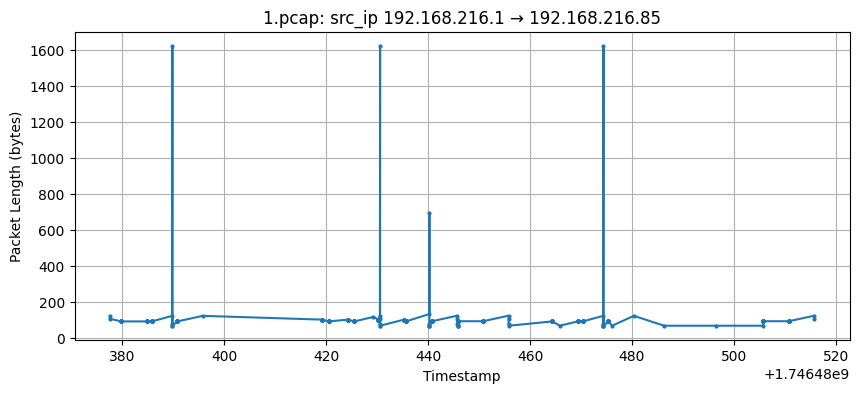

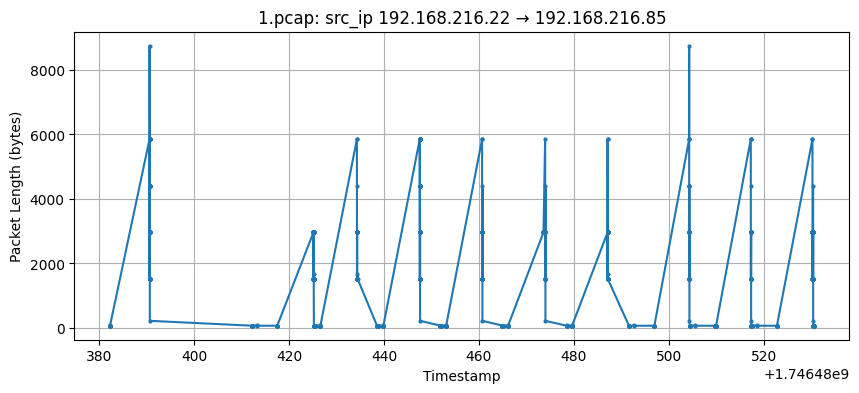

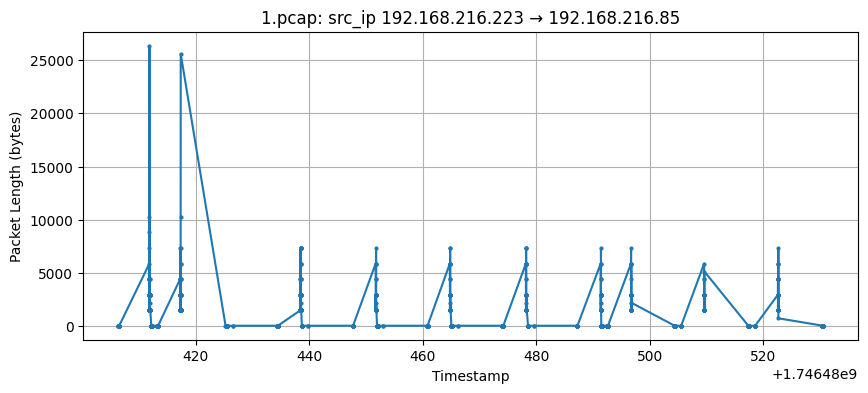

Finished plotting for 1.pcap.

Processing 2.pcap ...


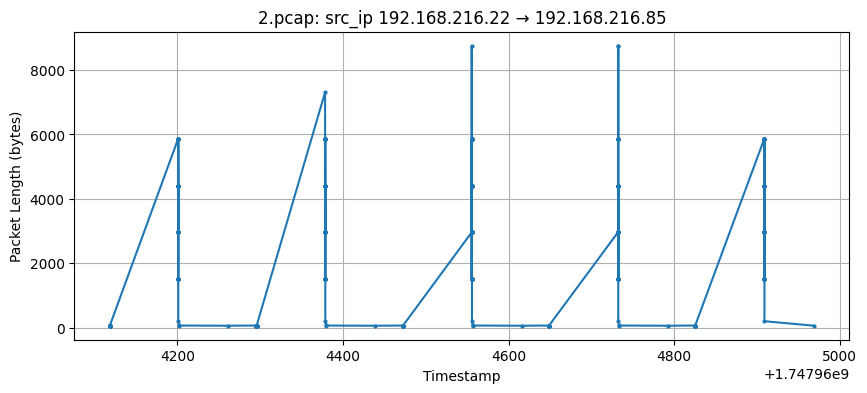

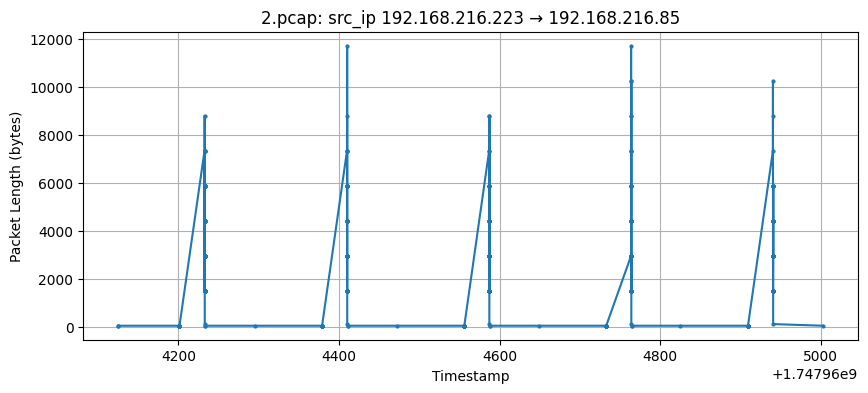

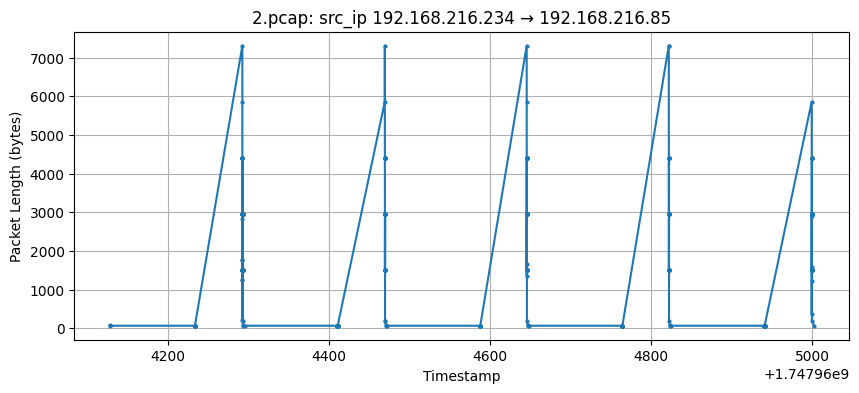

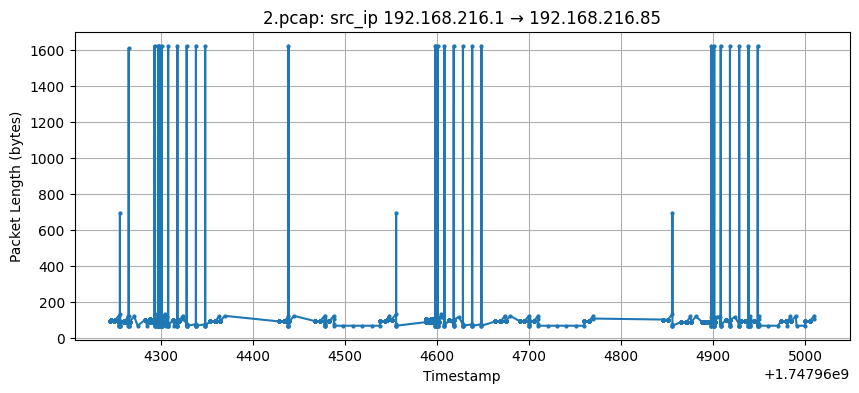

Finished plotting for 2.pcap.

Processing 3.pcap ...


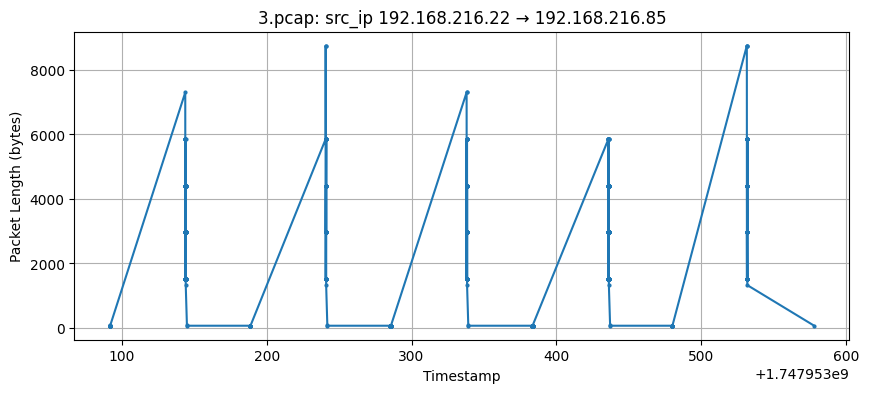

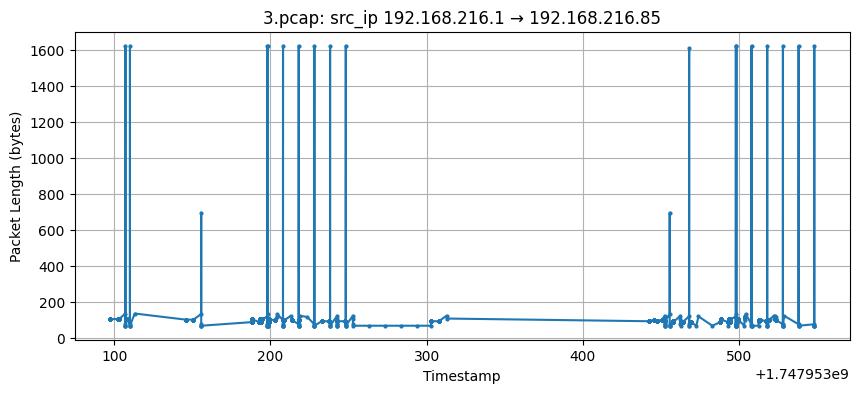

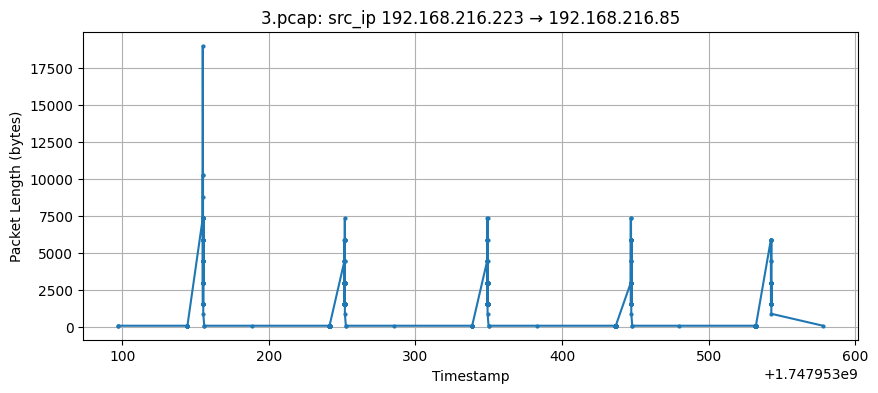

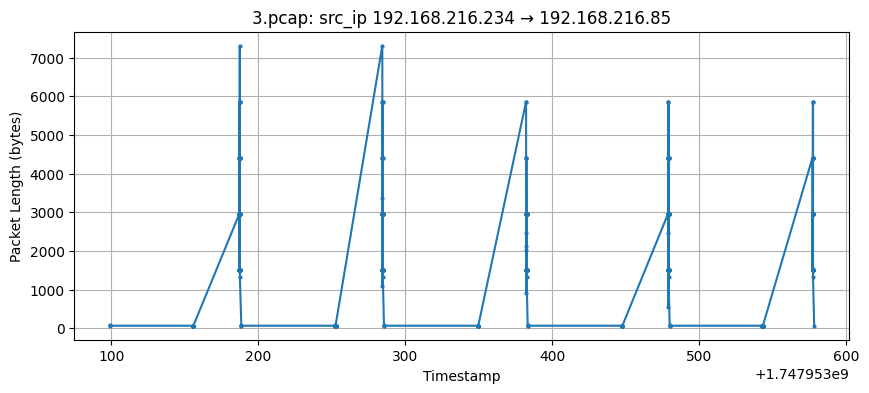

Finished plotting for 3.pcap.

Processing 4.pcap ...


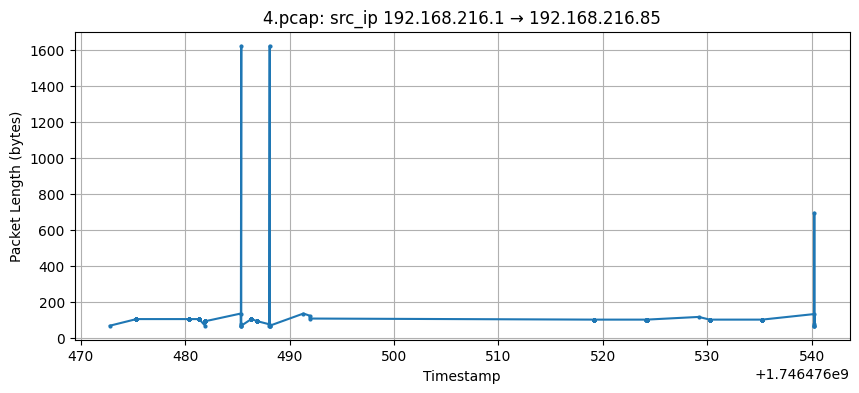

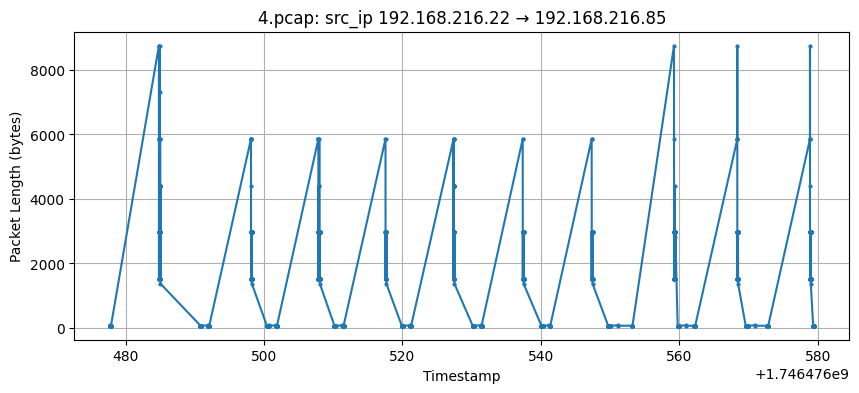

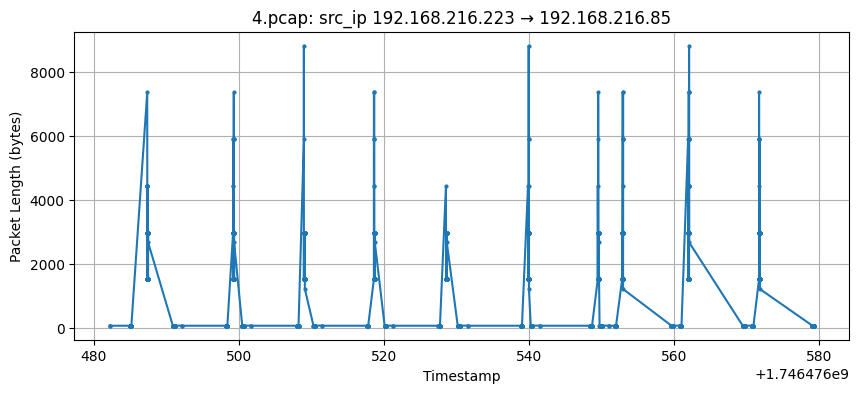

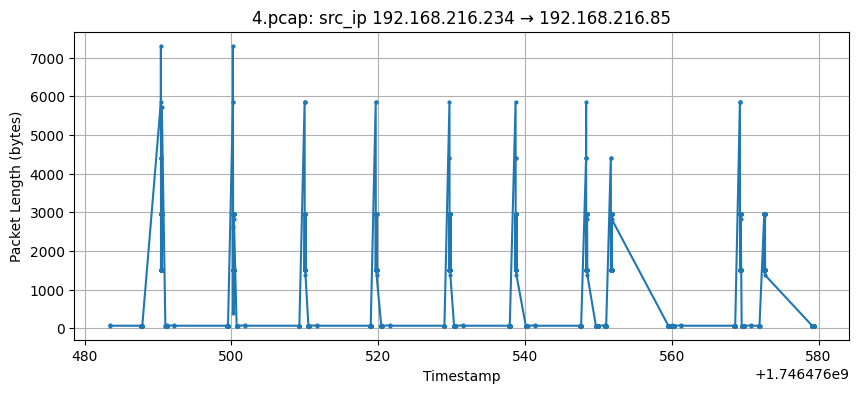

Finished plotting for 4.pcap.

Processing 5.pcap ...


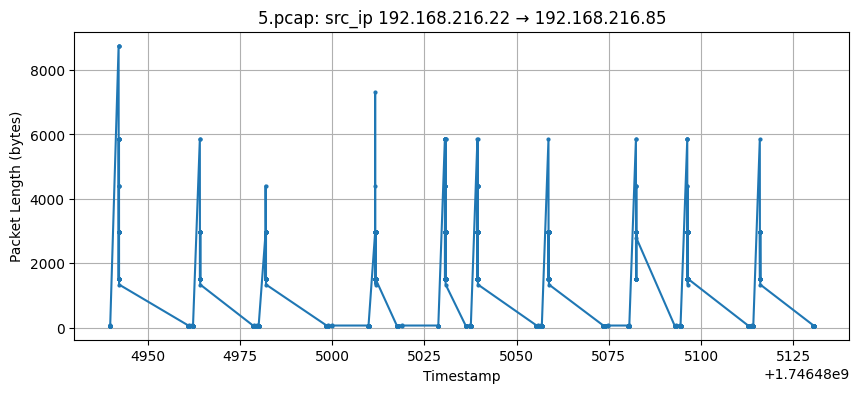

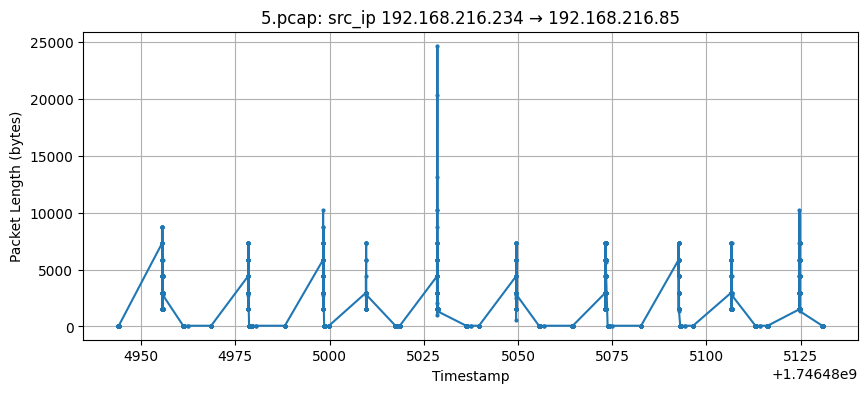

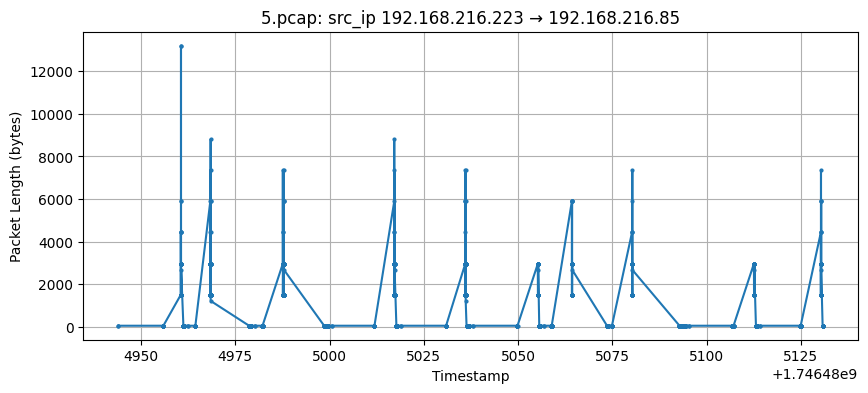

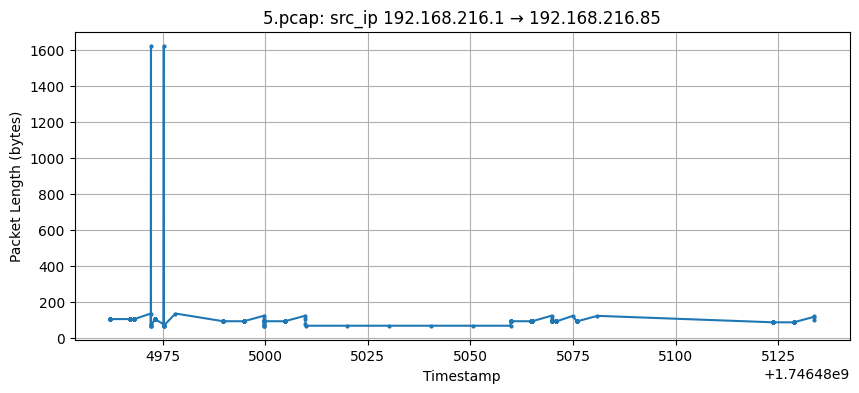

Finished plotting for 5.pcap.

Processing 6.pcap ...


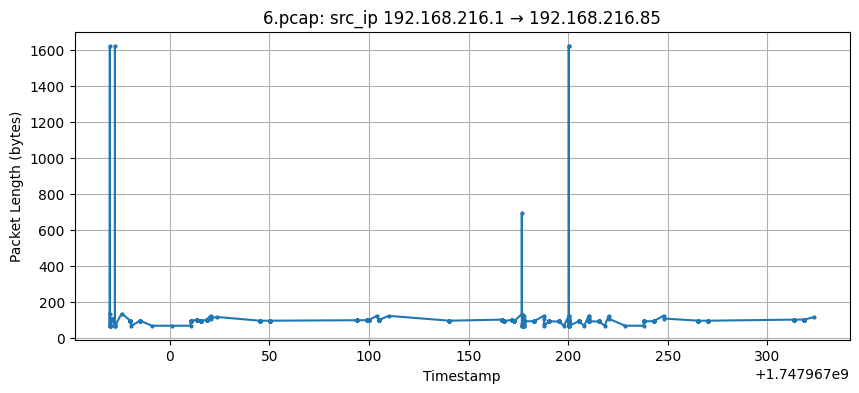

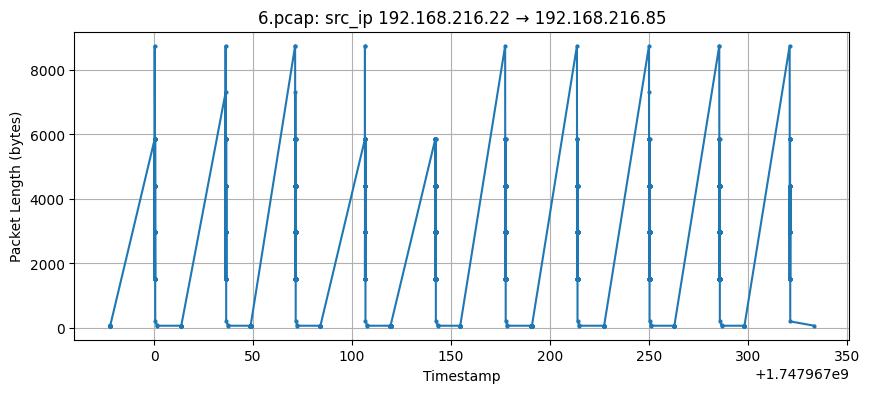

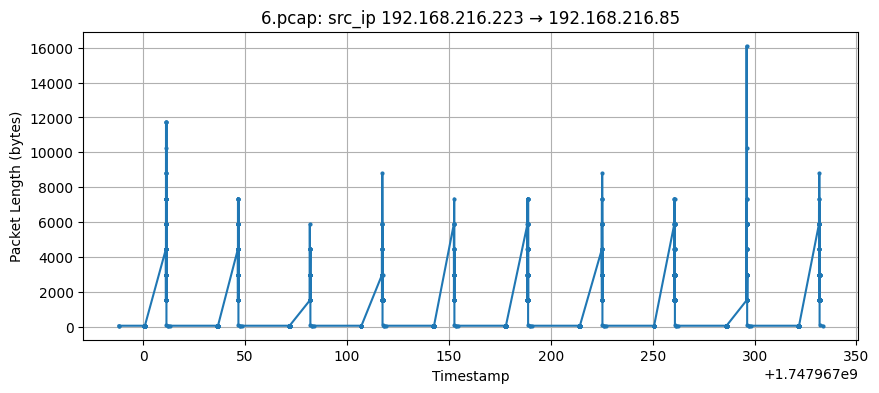

Finished plotting for 6.pcap.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install scapy

import os
from scapy.all import rdpcap
import matplotlib.pyplot as plt

pcapFolder = "/content/drive/My Drive/pcapFL"
serverIp = "192.168.216.85"

pcapFiles = sorted(
    [fileName for fileName in os.listdir(pcapFolder) if fileName.endswith(".pcap")],
    key=lambda fileName: int(fileName.split(".")[0])
)

for pcapFile in pcapFiles:
    print(f"\nProcessing {pcapFile} ...")
    pcapPath = os.path.join(pcapFolder, pcapFile)

    packets = rdpcap(pcapPath)
    dataByIp = {}

    for packet in packets:
        if packet.haslayer("IP"):
            if packet["IP"].dst != serverIp:
                continue

            srcIp = packet["IP"].src
            timestamp = packet.time
            length = len(packet)

            if not srcIp:
                continue

            if srcIp not in dataByIp:
                dataByIp[srcIp] = {"time": [], "length": []}

            dataByIp[srcIp]["time"].append(timestamp)
            dataByIp[srcIp]["length"].append(length)

    if len(dataByIp) == 0:
        print(f"No traffic to {serverIp} in {pcapFile}.")
        continue

    for ipAddress, values in dataByIp.items():
        plt.figure(figsize=(10, 4))
        plt.plot(values["time"], values["length"], marker='o', linestyle='-', markersize=2)
        plt.title(f"{pcapFile}: src_ip {ipAddress} → {serverIp}")
        plt.xlabel("Timestamp")
        plt.ylabel("Packet Length (bytes)")
        plt.grid(True)
        plt.show()

    print(f"Finished plotting for {pcapFile}.")


Server to client sending global updates

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processing 1.pcap ...


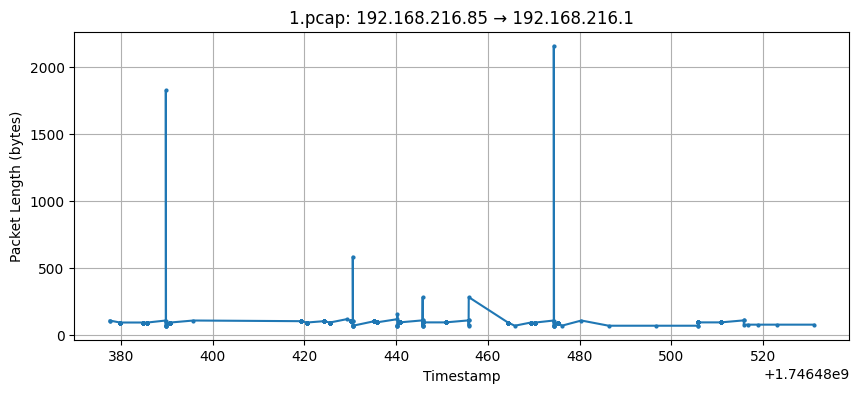

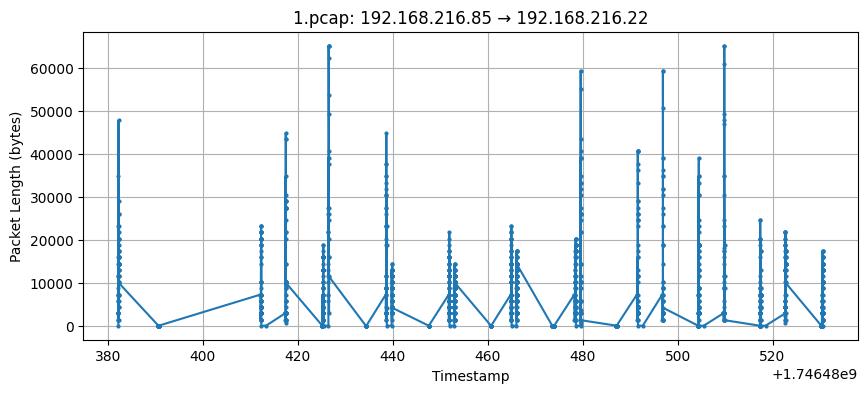

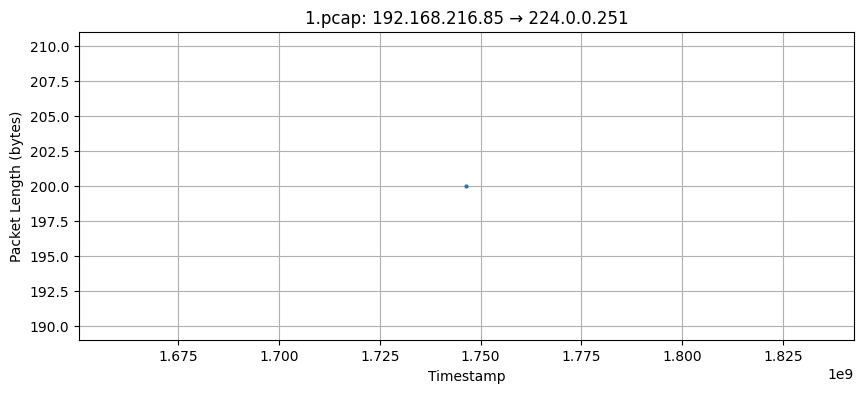

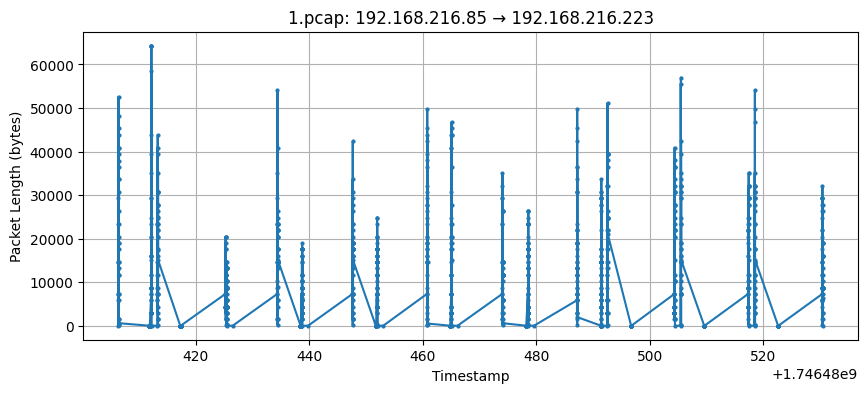

Finished plotting for 1.pcap.

Processing 2.pcap ...


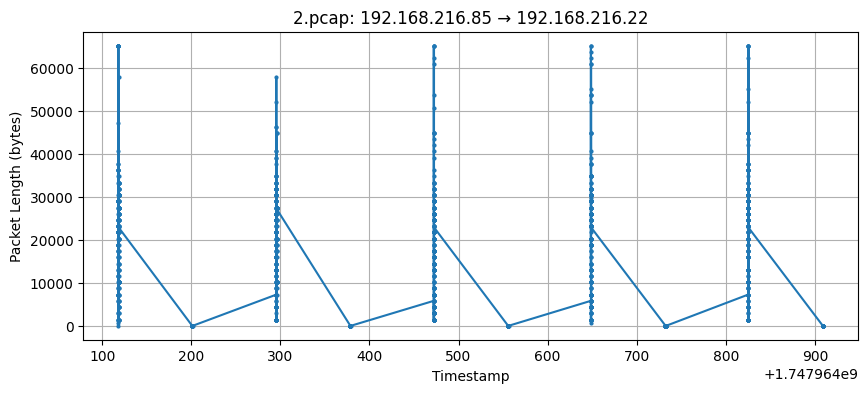

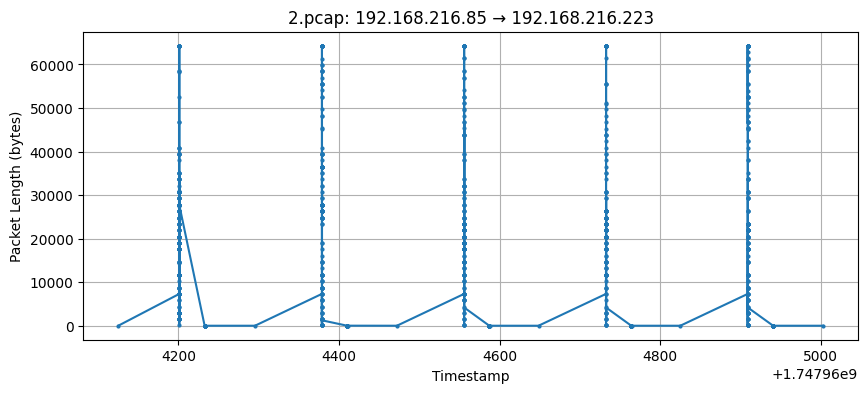

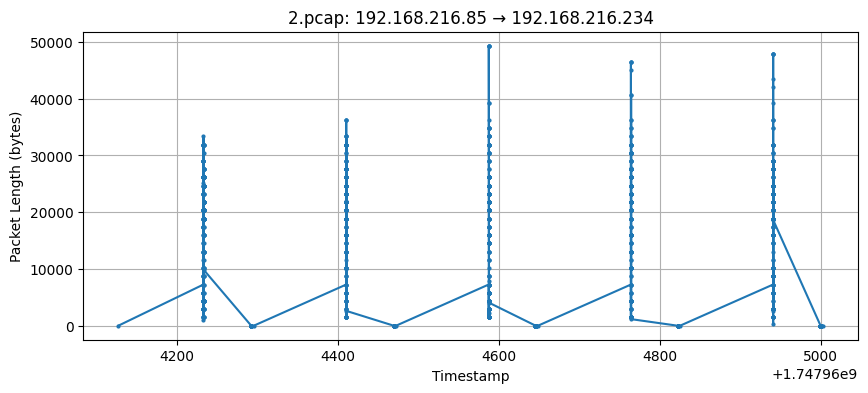

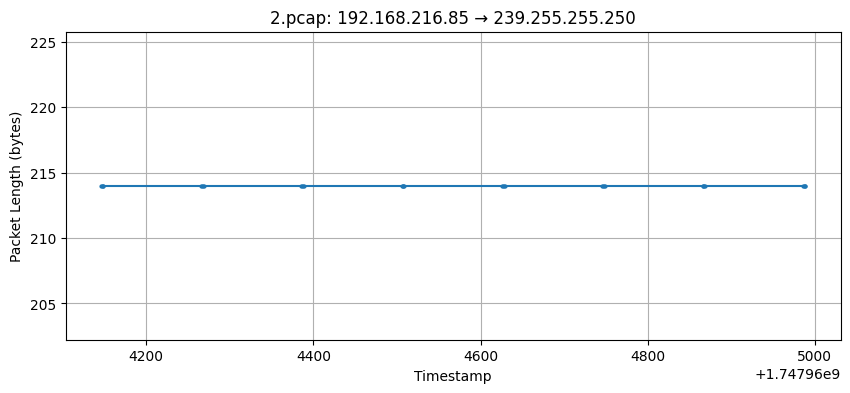

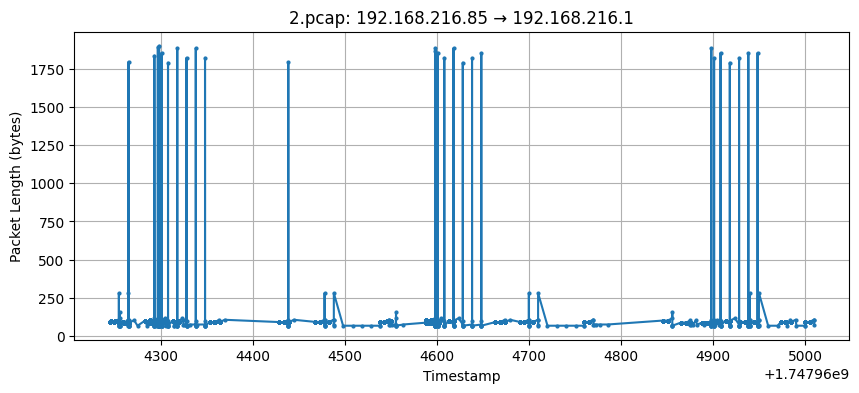

Finished plotting for 2.pcap.

Processing 3.pcap ...


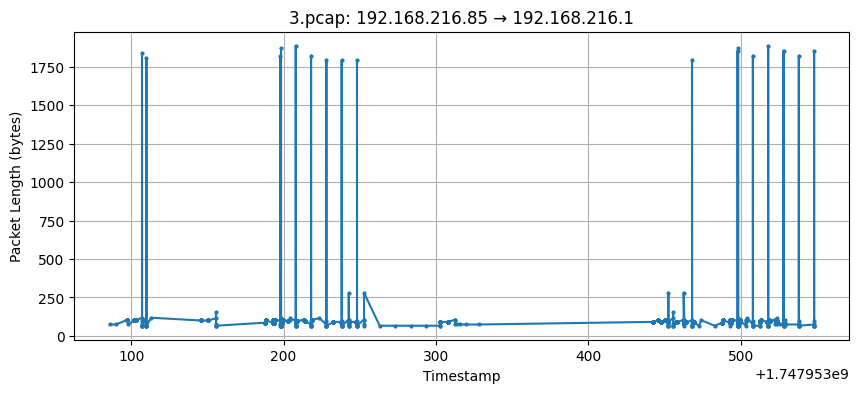

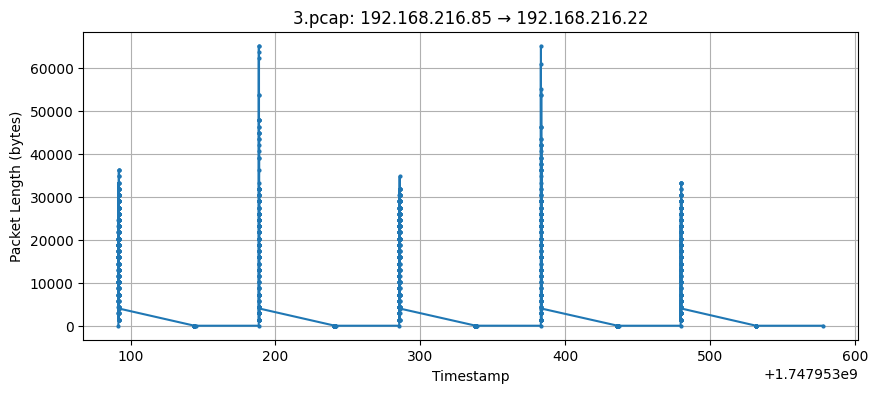

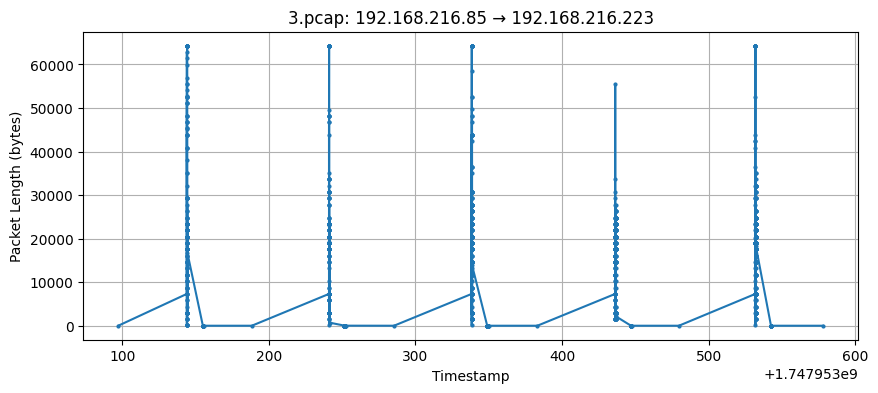

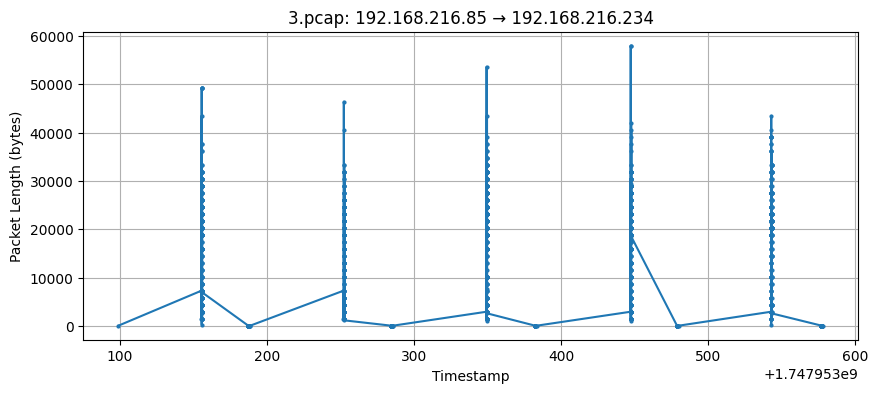

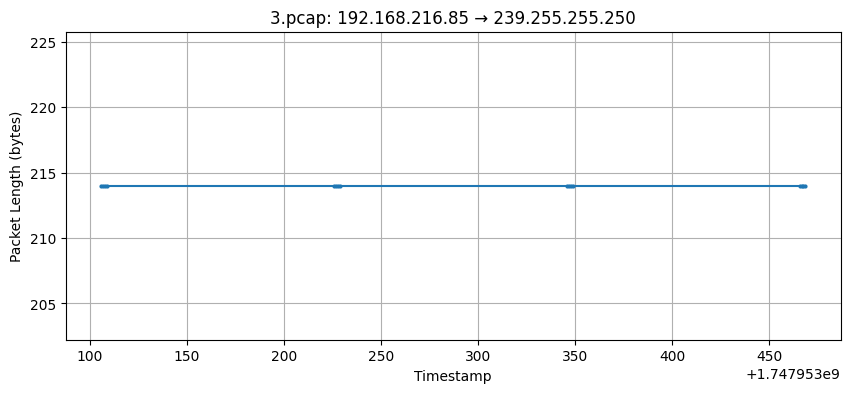

Finished plotting for 3.pcap.

Processing 4.pcap ...


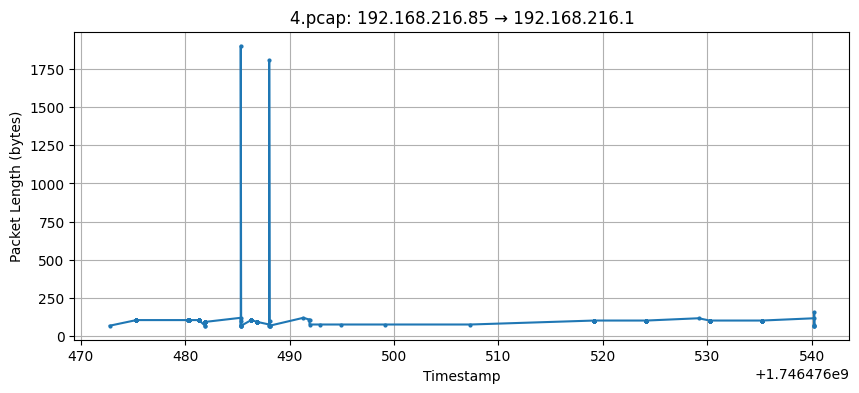

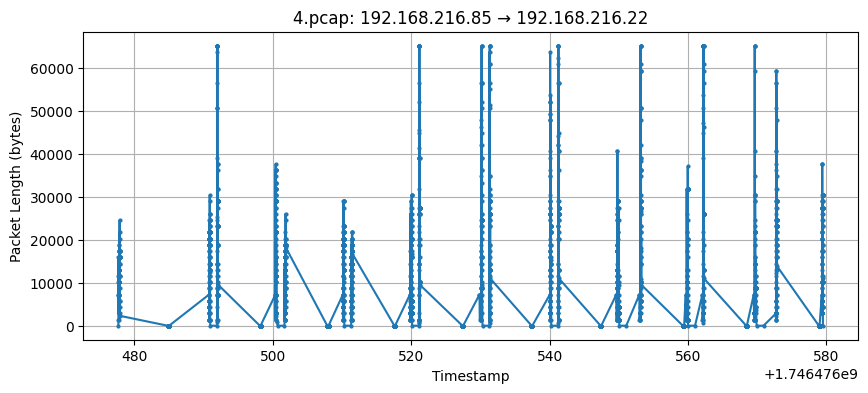

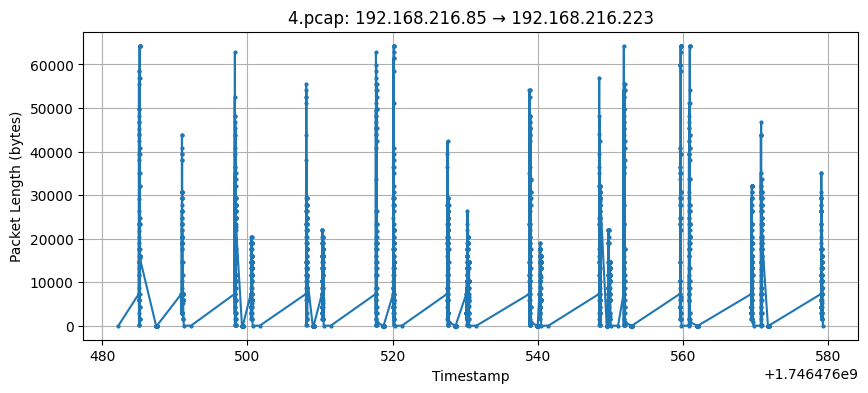

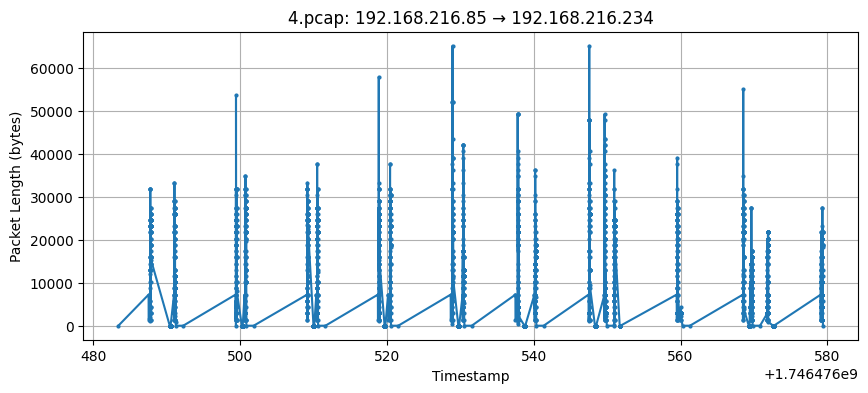

Finished plotting for 4.pcap.

Processing 5.pcap ...


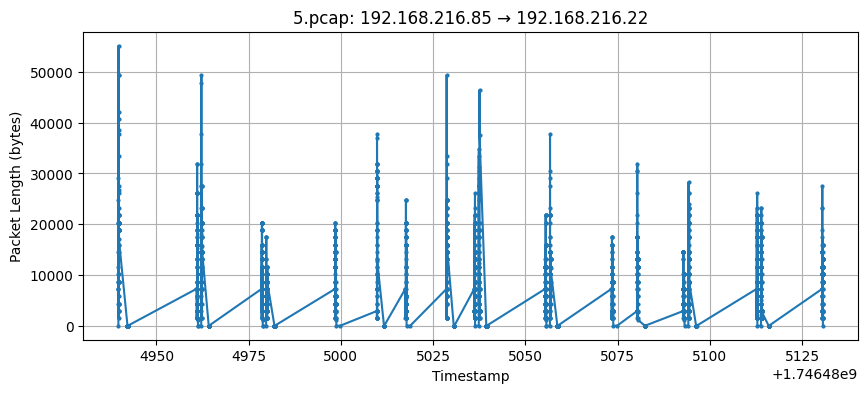

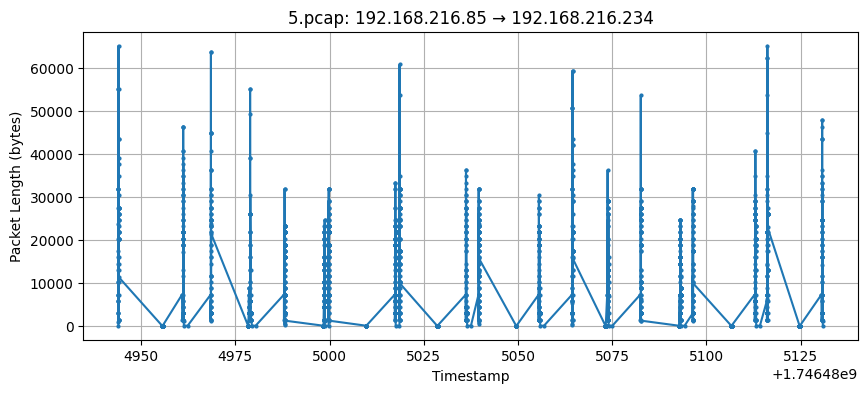

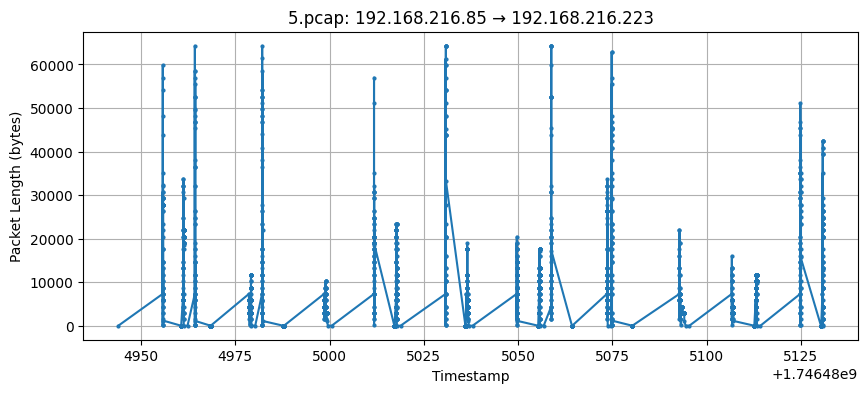

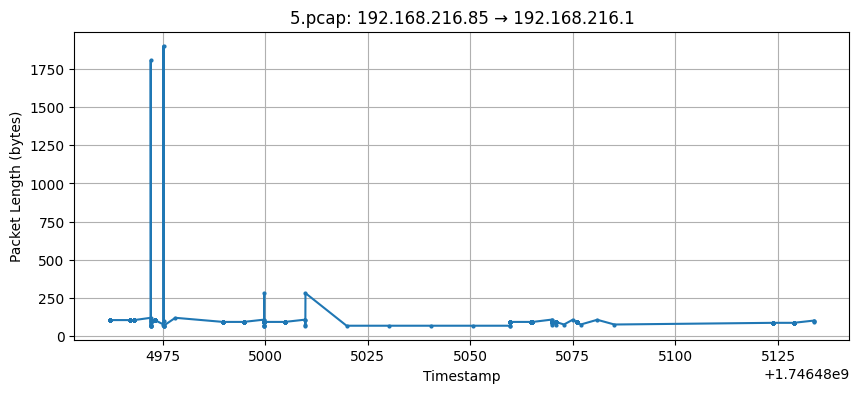

Finished plotting for 5.pcap.

Processing 6.pcap ...


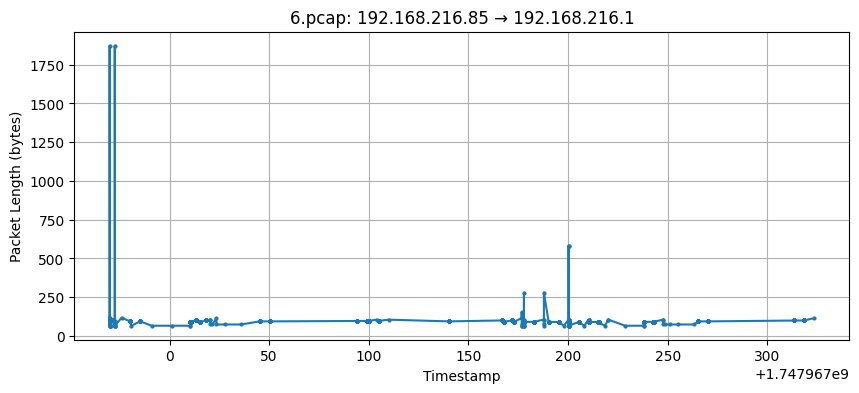

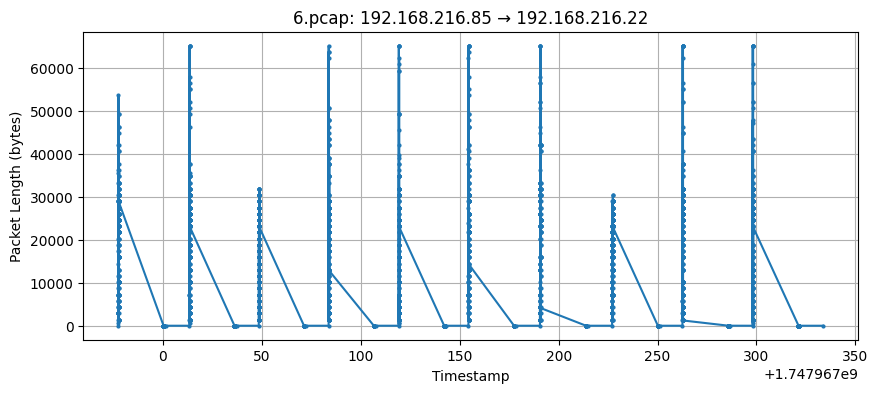

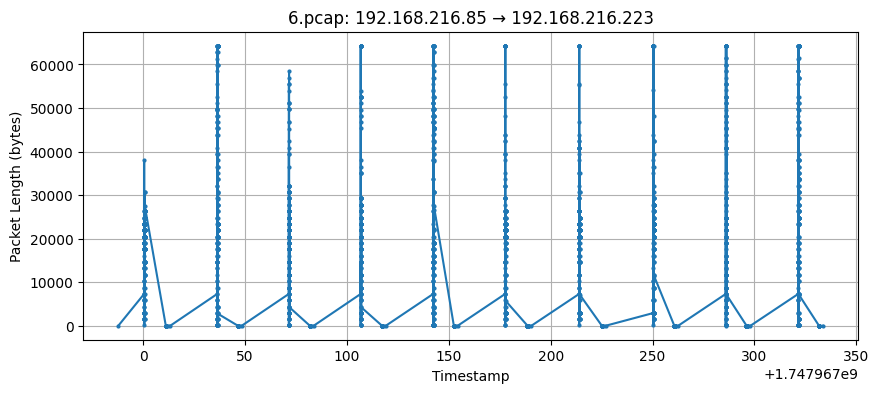

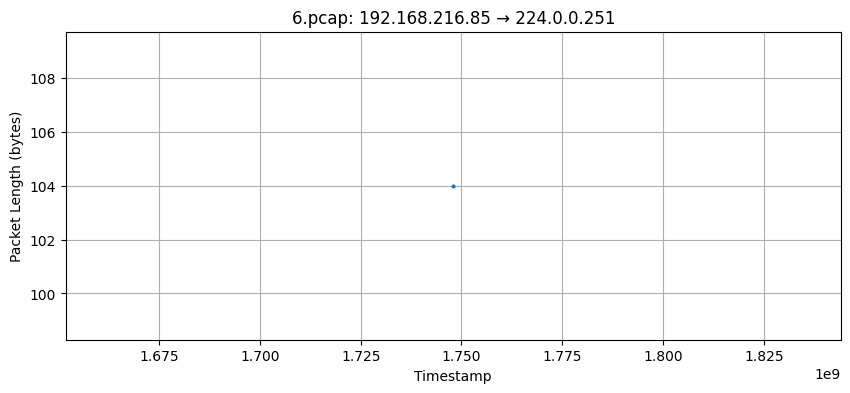

Finished plotting for 6.pcap.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

!pip install scapy

from scapy.all import rdpcap
import matplotlib.pyplot as plt
import os

pcapFolder = "/content/drive/My Drive/pcapFL"
serverIp = "192.168.216.85"

pcapFiles = sorted(
    [fileName for fileName in os.listdir(pcapFolder) if fileName.endswith(".pcap")],
    key=lambda fileName: int(fileName.split(".")[0])
)

for pcapFile in pcapFiles:
    print(f"\nProcessing {pcapFile} ...")

    pcapPath = os.path.join(pcapFolder, pcapFile)
    packets = rdpcap(pcapPath)

    dataByDst = {}

    for packet in packets:
        if packet.haslayer("IP"):
            if packet["IP"].src != serverIp:
                continue

            dstIp = packet["IP"].dst
            timestamp = packet.time
            length = len(packet)

            if dstIp not in dataByDst:
                dataByDst[dstIp] = {"time": [], "length": []}

            dataByDst[dstIp]["time"].append(timestamp)
            dataByDst[dstIp]["length"].append(length)

    if len(dataByDst) == 0:
        print(f"No outgoing traffic from {serverIp} in {pcapFile}.")
        continue

    for dstIp, values in dataByDst.items():
        plt.figure(figsize=(10, 4))
        plt.plot(values["time"], values["length"], marker='o', linestyle='-', markersize=2)
        plt.title(f"{pcapFile}: {serverIp} → {dstIp}")
        plt.xlabel("Timestamp")
        plt.ylabel("Packet Length (bytes)")
        plt.grid(True)
        plt.show()

    print(f"Finished plotting for {pcapFile}.")


Checking Burst Timings and Interarrivals - this made me believe that it is a synchronous model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processing 1.pcap

Client 192.168.216.1 TRUE upload rounds in 1.pcap:
  Round 1 at timestamp: 1746480389.805421
  Round 2 at timestamp: 1746480430.572280
  Round 3 at timestamp: 1746480440.248014
  Round 4 at timestamp: 1746480474.411266

Time differences between consecutive rounds:
  Round 1 -> Round 2: 40.767 seconds
  Round 2 -> Round 3: 9.676 seconds
  Round 3 -> Round 4: 34.163 seconds


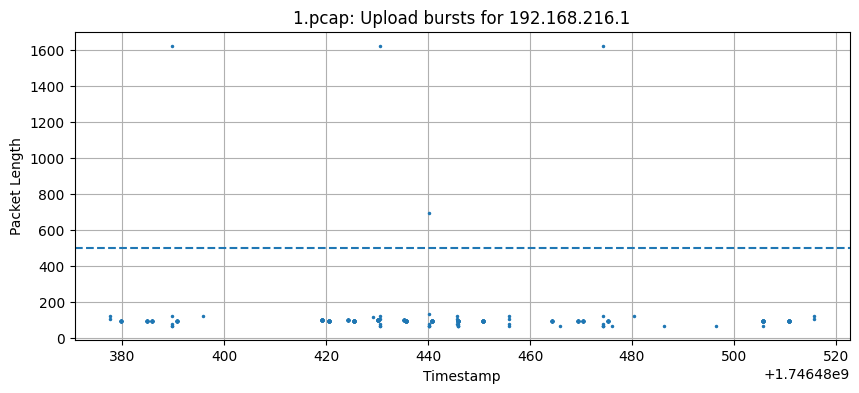


Client 192.168.216.22 TRUE upload rounds in 1.pcap:
  Round 1 at timestamp: 1746480390.605521
  Round 2 at timestamp: 1746480425.126833
  Round 3 at timestamp: 1746480434.287618
  Round 4 at timestamp: 1746480447.530473
  Round 5 at timestamp: 1746480460.662877
  Round 6 at timestamp: 1746480473.594112
  Round 7 at timestamp: 1746480487.091596
  Round 8 at timestamp: 1746480504.283425
  Round 9 at timestamp: 1746480517.265971
  Round 10 at timestamp: 1746480530.259618

Time differences between consecutive rounds:
  Round 1 -> Round 2: 34.521 seconds
  Round 2 -> Round 3: 9.161 seconds
  Round 3 -> Round 4: 13.243 seconds
  Round 4 -> Round 5: 13.132 seconds
  Round 5 -> Round 6: 12.931 seconds
  Round 6 -> Round 7: 13.497 seconds
  Round 7 -> Round 8: 17.192 seconds
  Round 8 -> Round 9: 12.983 seconds
  Round 9 -> Round 10: 12.994 seconds


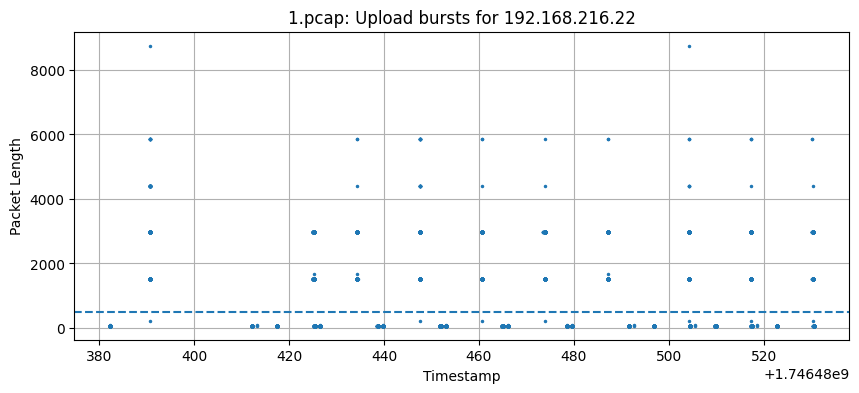


Client 192.168.216.223 TRUE upload rounds in 1.pcap:
  Round 1 at timestamp: 1746480411.805587
  Round 2 at timestamp: 1746480417.223562
  Round 3 at timestamp: 1746480438.433898
  Round 4 at timestamp: 1746480451.686715
  Round 5 at timestamp: 1746480464.764692
  Round 6 at timestamp: 1746480478.166104
  Round 7 at timestamp: 1746480491.352020
  Round 8 at timestamp: 1746480496.698114
  Round 9 at timestamp: 1746480509.587215
  Round 10 at timestamp: 1746480522.601783

Time differences between consecutive rounds:
  Round 1 -> Round 2: 5.418 seconds
  Round 2 -> Round 3: 21.210 seconds
  Round 3 -> Round 4: 13.253 seconds
  Round 4 -> Round 5: 13.078 seconds
  Round 5 -> Round 6: 13.401 seconds
  Round 6 -> Round 7: 13.186 seconds
  Round 7 -> Round 8: 5.346 seconds
  Round 8 -> Round 9: 12.889 seconds
  Round 9 -> Round 10: 13.015 seconds


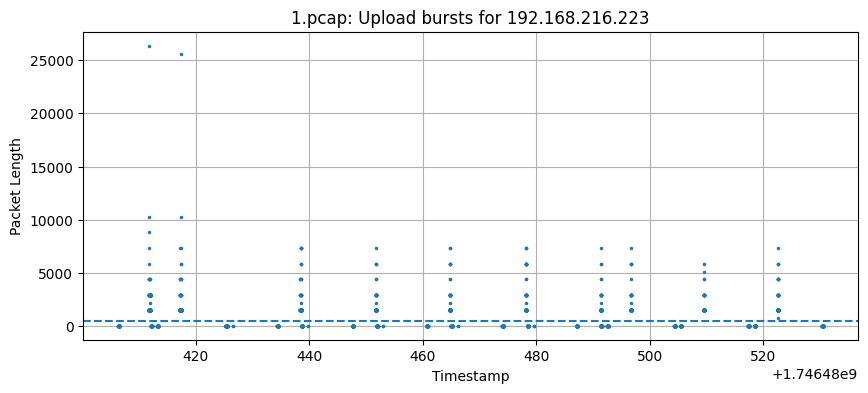


Processing 2.pcap

Client 192.168.216.22 TRUE upload rounds in 2.pcap:
  Round 1 at timestamp: 1747964200.749380
  Round 2 at timestamp: 1747964378.328187
  Round 3 at timestamp: 1747964555.456595
  Round 4 at timestamp: 1747964732.176788
  Round 5 at timestamp: 1747964908.763164

Time differences between consecutive rounds:
  Round 1 -> Round 2: 177.579 seconds
  Round 2 -> Round 3: 177.128 seconds
  Round 3 -> Round 4: 176.720 seconds
  Round 4 -> Round 5: 176.586 seconds


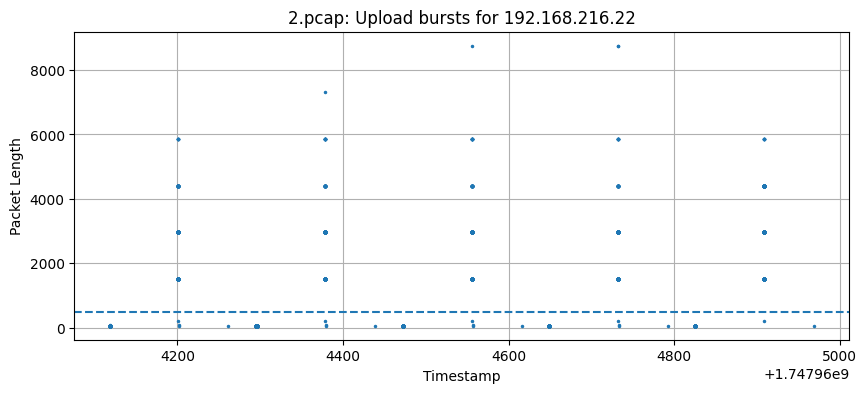


Client 192.168.216.223 TRUE upload rounds in 2.pcap:
  Round 1 at timestamp: 1747964232.502953
  Round 2 at timestamp: 1747964409.944064
  Round 3 at timestamp: 1747964586.966149
  Round 4 at timestamp: 1747964763.758934
  Round 5 at timestamp: 1747964940.416539

Time differences between consecutive rounds:
  Round 1 -> Round 2: 177.441 seconds
  Round 2 -> Round 3: 177.022 seconds
  Round 3 -> Round 4: 176.793 seconds
  Round 4 -> Round 5: 176.658 seconds


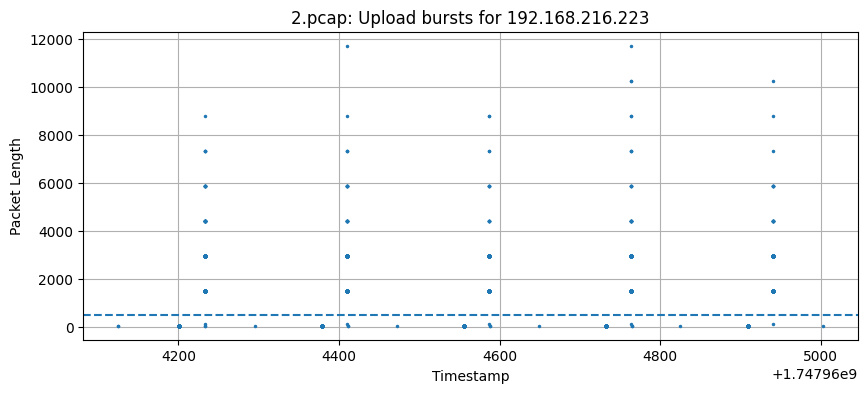


Client 192.168.216.234 TRUE upload rounds in 2.pcap:
  Round 1 at timestamp: 1747964292.084502
  Round 2 at timestamp: 1747964469.129401
  Round 3 at timestamp: 1747964645.450710
  Round 4 at timestamp: 1747964822.032638
  Round 5 at timestamp: 1747964999.634379

Time differences between consecutive rounds:
  Round 1 -> Round 2: 177.045 seconds
  Round 2 -> Round 3: 176.321 seconds
  Round 3 -> Round 4: 176.582 seconds
  Round 4 -> Round 5: 177.602 seconds


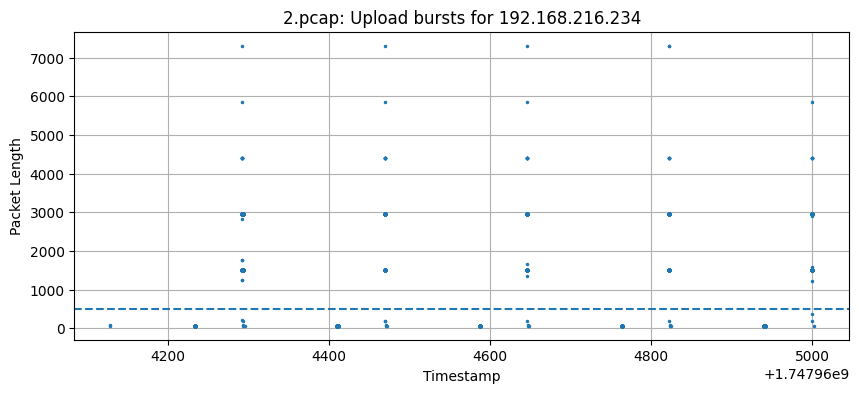


Client 192.168.216.1 TRUE upload rounds in 2.pcap:
  Round 1 at timestamp: 1747964255.640173
  Round 2 at timestamp: 1747964265.157570
  Round 3 at timestamp: 1747964293.232771
  Round 4 at timestamp: 1747964296.993406
  Round 5 at timestamp: 1747964297.994069
  Round 6 at timestamp: 1747964301.002795
  Round 7 at timestamp: 1747964308.039065
  Round 8 at timestamp: 1747964318.087137
  Round 9 at timestamp: 1747964328.134403
  Round 10 at timestamp: 1747964338.181535
  Round 11 at timestamp: 1747964348.227609
  Round 12 at timestamp: 1747964438.651997
  Round 13 at timestamp: 1747964555.579589
  Round 14 at timestamp: 1747964597.995484
  Round 15 at timestamp: 1747964601.005411
  Round 16 at timestamp: 1747964608.040135
  Round 17 at timestamp: 1747964618.084666
  Round 18 at timestamp: 1747964628.130132
  Round 19 at timestamp: 1747964638.174965
  Round 20 at timestamp: 1747964648.216648
  Round 21 at timestamp: 1747964855.595855
  Round 22 at timestamp: 1747964898.003599
  Round 23 

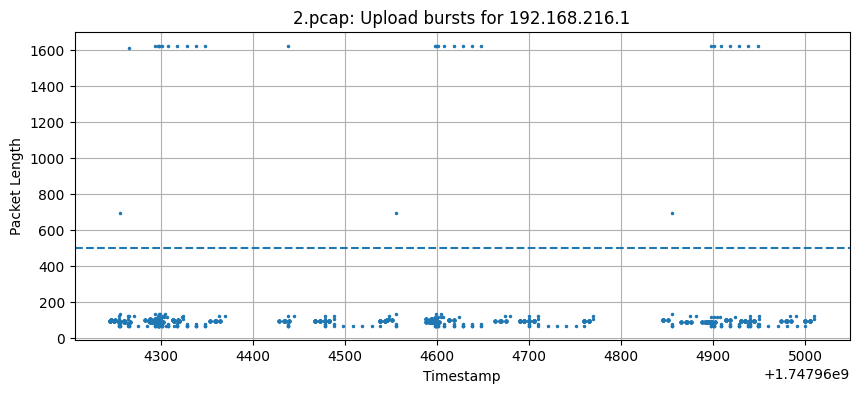


Processing 3.pcap

Client 192.168.216.22 TRUE upload rounds in 3.pcap:
  Round 1 at timestamp: 1747953143.764567
  Round 2 at timestamp: 1747953240.712752
  Round 3 at timestamp: 1747953338.036363
  Round 4 at timestamp: 1747953435.942559
  Round 5 at timestamp: 1747953531.528560

Time differences between consecutive rounds:
  Round 1 -> Round 2: 96.948 seconds
  Round 2 -> Round 3: 97.324 seconds
  Round 3 -> Round 4: 97.906 seconds
  Round 4 -> Round 5: 95.586 seconds


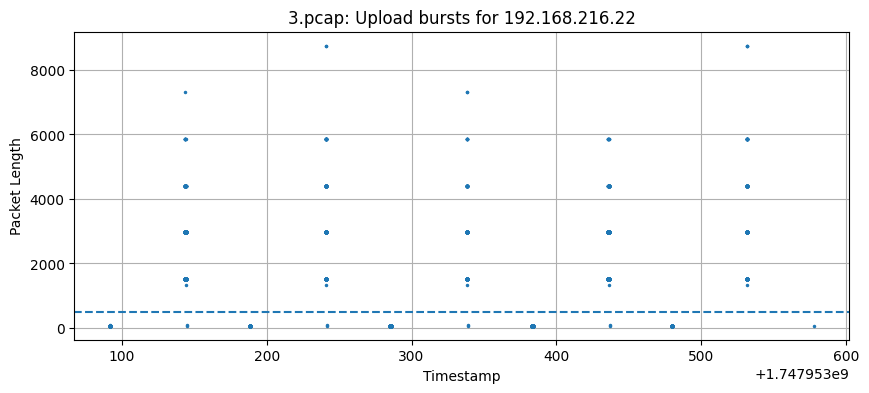


Client 192.168.216.1 TRUE upload rounds in 3.pcap:
  Round 1 at timestamp: 1747953107.116540
  Round 2 at timestamp: 1747953110.000740
  Round 3 at timestamp: 1747953155.630645
  Round 4 at timestamp: 1747953197.972360
  Round 5 at timestamp: 1747953208.020005
  Round 6 at timestamp: 1747953218.066551
  Round 7 at timestamp: 1747953228.114429
  Round 8 at timestamp: 1747953238.161599
  Round 9 at timestamp: 1747953248.210367
  Round 10 at timestamp: 1747953455.641275
  Round 11 at timestamp: 1747953468.100999
  Round 12 at timestamp: 1747953498.001605
  Round 13 at timestamp: 1747953508.048222
  Round 14 at timestamp: 1747953518.095721
  Round 15 at timestamp: 1747953528.143146
  Round 16 at timestamp: 1747953538.190244
  Round 17 at timestamp: 1747953548.236184

Time differences between consecutive rounds:
  Round 1 -> Round 2: 2.884 seconds
  Round 2 -> Round 3: 45.630 seconds
  Round 3 -> Round 4: 42.342 seconds
  Round 4 -> Round 5: 10.048 seconds
  Round 5 -> Round 6: 10.047 seco

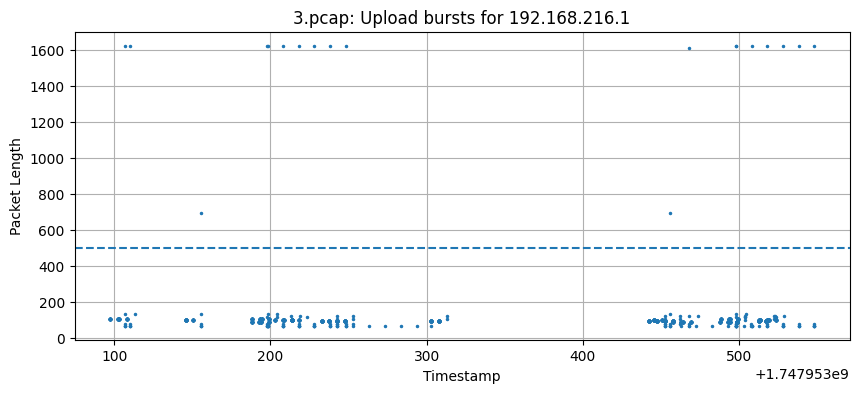


Client 192.168.216.223 TRUE upload rounds in 3.pcap:
  Round 1 at timestamp: 1747953154.955333
  Round 2 at timestamp: 1747953251.563828
  Round 3 at timestamp: 1747953348.902600
  Round 4 at timestamp: 1747953446.912370
  Round 5 at timestamp: 1747953542.457193

Time differences between consecutive rounds:
  Round 1 -> Round 2: 96.608 seconds
  Round 2 -> Round 3: 97.339 seconds
  Round 3 -> Round 4: 98.010 seconds
  Round 4 -> Round 5: 95.545 seconds


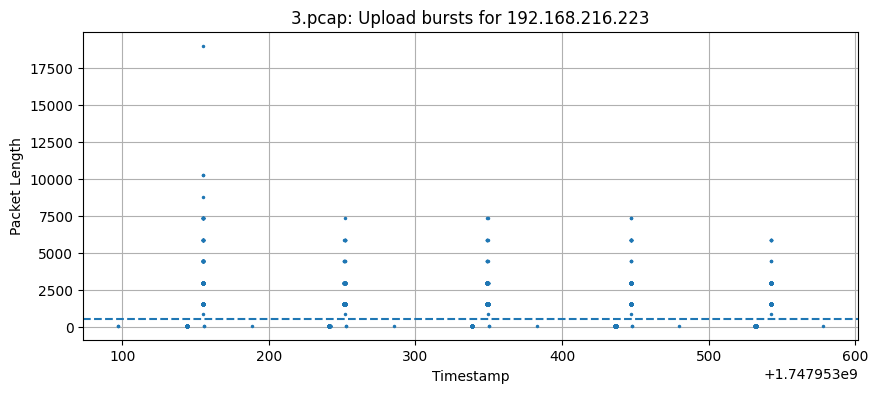


Client 192.168.216.234 TRUE upload rounds in 3.pcap:
  Round 1 at timestamp: 1747953187.139352
  Round 2 at timestamp: 1747953284.339377
  Round 3 at timestamp: 1747953382.107860
  Round 4 at timestamp: 1747953478.667789
  Round 5 at timestamp: 1747953576.896061

Time differences between consecutive rounds:
  Round 1 -> Round 2: 97.200 seconds
  Round 2 -> Round 3: 97.768 seconds
  Round 3 -> Round 4: 96.560 seconds
  Round 4 -> Round 5: 98.228 seconds


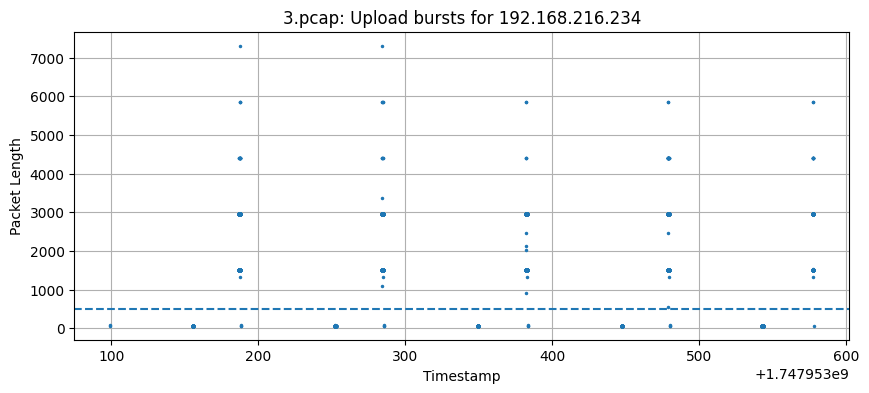


Processing 4.pcap

Client 192.168.216.1 TRUE upload rounds in 4.pcap:
  Round 1 at timestamp: 1746476485.364952
  Round 2 at timestamp: 1746476488.088280
  Round 3 at timestamp: 1746476540.248060

Time differences between consecutive rounds:
  Round 1 -> Round 2: 2.723 seconds
  Round 2 -> Round 3: 52.160 seconds


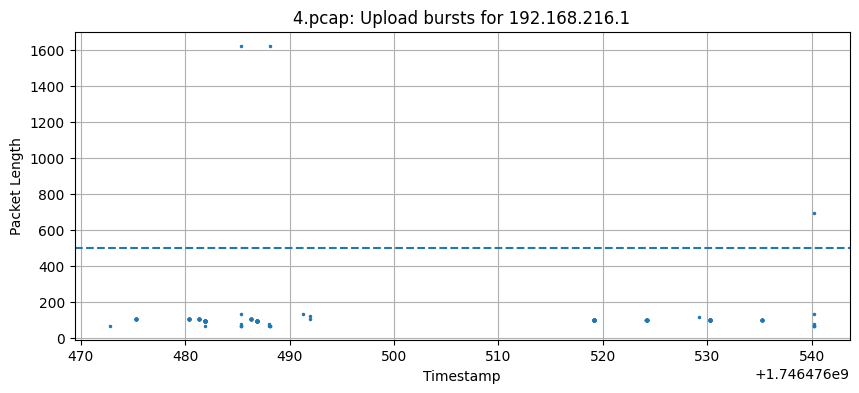


Client 192.168.216.22 TRUE upload rounds in 4.pcap:
  Round 1 at timestamp: 1746476484.811289
  Round 2 at timestamp: 1746476498.112107
  Round 3 at timestamp: 1746476507.852389
  Round 4 at timestamp: 1746476517.549813
  Round 5 at timestamp: 1746476527.382459
  Round 6 at timestamp: 1746476537.375358
  Round 7 at timestamp: 1746476547.340115
  Round 8 at timestamp: 1746476559.234220
  Round 9 at timestamp: 1746476568.383272
  Round 10 at timestamp: 1746476578.884391

Time differences between consecutive rounds:
  Round 1 -> Round 2: 13.301 seconds
  Round 2 -> Round 3: 9.740 seconds
  Round 3 -> Round 4: 9.697 seconds
  Round 4 -> Round 5: 9.833 seconds
  Round 5 -> Round 6: 9.993 seconds
  Round 6 -> Round 7: 9.965 seconds
  Round 7 -> Round 8: 11.894 seconds
  Round 8 -> Round 9: 9.149 seconds
  Round 9 -> Round 10: 10.501 seconds


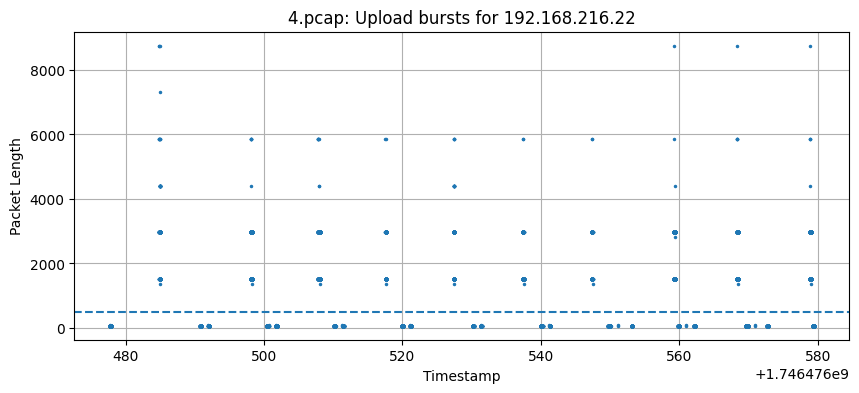


Client 192.168.216.223 TRUE upload rounds in 4.pcap:
  Round 1 at timestamp: 1746476487.393036
  Round 2 at timestamp: 1746476499.225629
  Round 3 at timestamp: 1746476508.978692
  Round 4 at timestamp: 1746476518.626614
  Round 5 at timestamp: 1746476528.556520
  Round 6 at timestamp: 1746476539.865404
  Round 7 at timestamp: 1746476549.479219
  Round 8 at timestamp: 1746476552.835538
  Round 9 at timestamp: 1746476561.925732
  Round 10 at timestamp: 1746476571.700687

Time differences between consecutive rounds:
  Round 1 -> Round 2: 11.833 seconds
  Round 2 -> Round 3: 9.753 seconds
  Round 3 -> Round 4: 9.648 seconds
  Round 4 -> Round 5: 9.930 seconds
  Round 5 -> Round 6: 11.309 seconds
  Round 6 -> Round 7: 9.614 seconds
  Round 7 -> Round 8: 3.356 seconds
  Round 8 -> Round 9: 9.090 seconds
  Round 9 -> Round 10: 9.775 seconds


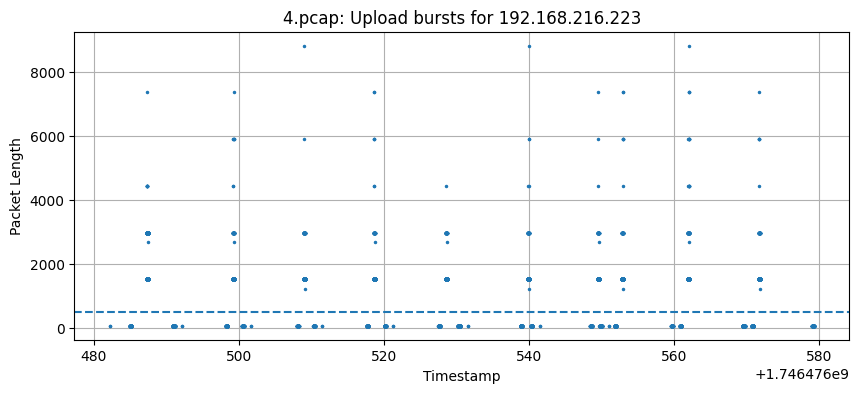


Client 192.168.216.234 TRUE upload rounds in 4.pcap:
  Round 1 at timestamp: 1746476490.382195
  Round 2 at timestamp: 1746476500.204555
  Round 3 at timestamp: 1746476509.968213
  Round 4 at timestamp: 1746476519.656607
  Round 5 at timestamp: 1746476529.708426
  Round 6 at timestamp: 1746476538.717836
  Round 7 at timestamp: 1746476548.322578
  Round 8 at timestamp: 1746476551.694914
  Round 9 at timestamp: 1746476569.285421
  Round 10 at timestamp: 1746476572.602525

Time differences between consecutive rounds:
  Round 1 -> Round 2: 9.822 seconds
  Round 2 -> Round 3: 9.764 seconds
  Round 3 -> Round 4: 9.688 seconds
  Round 4 -> Round 5: 10.052 seconds
  Round 5 -> Round 6: 9.009 seconds
  Round 6 -> Round 7: 9.605 seconds
  Round 7 -> Round 8: 3.372 seconds
  Round 8 -> Round 9: 17.591 seconds
  Round 9 -> Round 10: 3.317 seconds


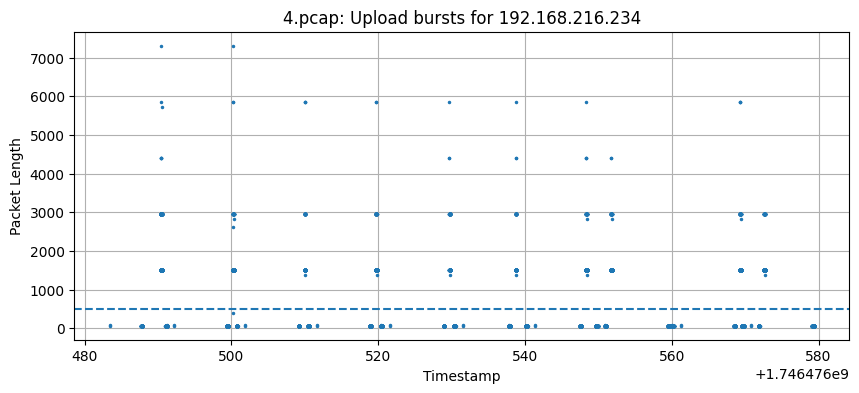


Processing 5.pcap

Client 192.168.216.22 TRUE upload rounds in 5.pcap:
  Round 1 at timestamp: 1746484942.132746
  Round 2 at timestamp: 1746484964.148689
  Round 3 at timestamp: 1746484981.974680
  Round 4 at timestamp: 1746485011.662207
  Round 5 at timestamp: 1746485030.566237
  Round 6 at timestamp: 1746485039.389604
  Round 7 at timestamp: 1746485058.649920
  Round 8 at timestamp: 1746485082.352444
  Round 9 at timestamp: 1746485096.271032
  Round 10 at timestamp: 1746485115.933050

Time differences between consecutive rounds:
  Round 1 -> Round 2: 22.016 seconds
  Round 2 -> Round 3: 17.826 seconds
  Round 3 -> Round 4: 29.688 seconds
  Round 4 -> Round 5: 18.904 seconds
  Round 5 -> Round 6: 8.823 seconds
  Round 6 -> Round 7: 19.260 seconds
  Round 7 -> Round 8: 23.703 seconds
  Round 8 -> Round 9: 13.919 seconds
  Round 9 -> Round 10: 19.662 seconds


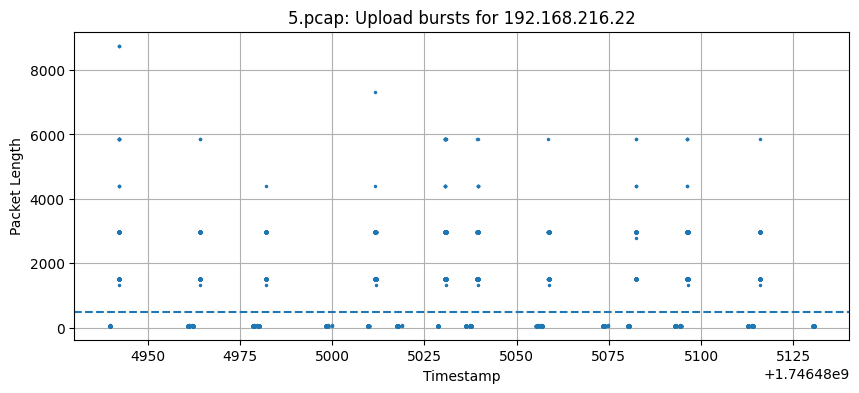


Client 192.168.216.234 TRUE upload rounds in 5.pcap:
  Round 1 at timestamp: 1746484955.536134
  Round 2 at timestamp: 1746484978.353755
  Round 3 at timestamp: 1746484998.283941
  Round 4 at timestamp: 1746485009.651166
  Round 5 at timestamp: 1746485028.501548
  Round 6 at timestamp: 1746485049.483181
  Round 7 at timestamp: 1746485073.184429
  Round 8 at timestamp: 1746485092.630553
  Round 9 at timestamp: 1746485106.556506
  Round 10 at timestamp: 1746485124.692711

Time differences between consecutive rounds:
  Round 1 -> Round 2: 22.818 seconds
  Round 2 -> Round 3: 19.930 seconds
  Round 3 -> Round 4: 11.367 seconds
  Round 4 -> Round 5: 18.850 seconds
  Round 5 -> Round 6: 20.982 seconds
  Round 6 -> Round 7: 23.701 seconds
  Round 7 -> Round 8: 19.446 seconds
  Round 8 -> Round 9: 13.926 seconds
  Round 9 -> Round 10: 18.136 seconds


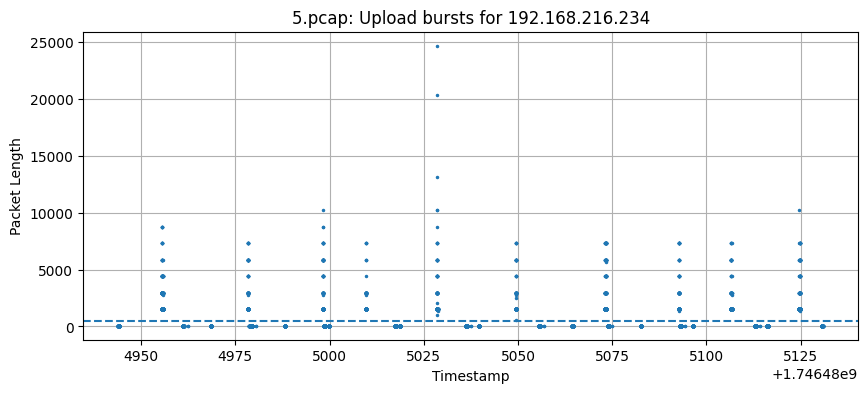


Client 192.168.216.223 TRUE upload rounds in 5.pcap:
  Round 1 at timestamp: 1746484960.534920
  Round 2 at timestamp: 1746484968.351398
  Round 3 at timestamp: 1746484987.598606
  Round 4 at timestamp: 1746485017.145770
  Round 5 at timestamp: 1746485035.996861
  Round 6 at timestamp: 1746485055.247021
  Round 7 at timestamp: 1746485064.258185
  Round 8 at timestamp: 1746485080.215275
  Round 9 at timestamp: 1746485112.561618
  Round 10 at timestamp: 1746485130.305796

Time differences between consecutive rounds:
  Round 1 -> Round 2: 7.816 seconds
  Round 2 -> Round 3: 19.247 seconds
  Round 3 -> Round 4: 29.547 seconds
  Round 4 -> Round 5: 18.851 seconds
  Round 5 -> Round 6: 19.250 seconds
  Round 6 -> Round 7: 9.011 seconds
  Round 7 -> Round 8: 15.957 seconds
  Round 8 -> Round 9: 32.346 seconds
  Round 9 -> Round 10: 17.744 seconds


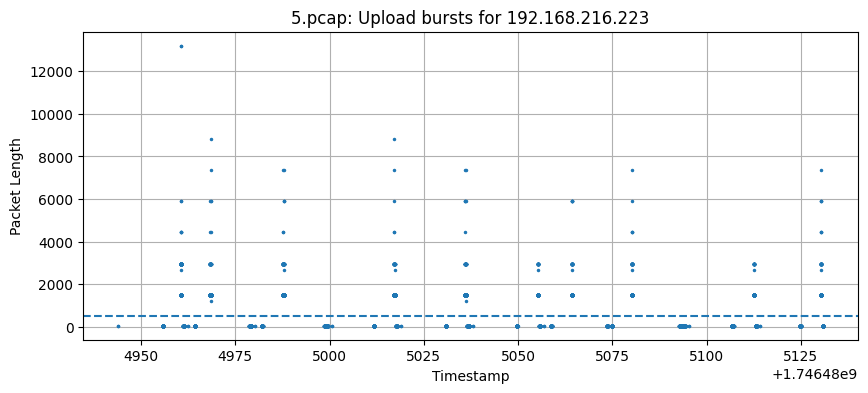


Client 192.168.216.1 TRUE upload rounds in 5.pcap:
  Round 1 at timestamp: 1746484972.143652
  Round 2 at timestamp: 1746484975.261544

Time differences between consecutive rounds:
  Round 1 -> Round 2: 3.118 seconds


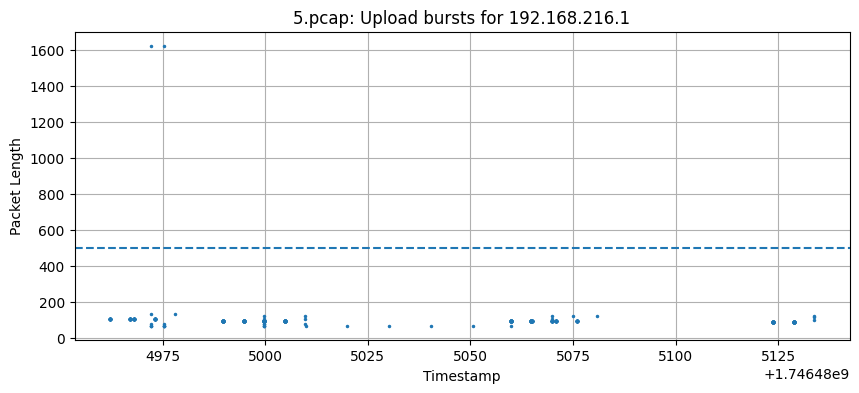


Processing 6.pcap

Client 192.168.216.1 TRUE upload rounds in 6.pcap:
  Round 1 at timestamp: 1747966969.984240
  Round 2 at timestamp: 1747966972.552234
  Round 3 at timestamp: 1747967176.727952
  Round 4 at timestamp: 1747967200.293482

Time differences between consecutive rounds:
  Round 1 -> Round 2: 2.568 seconds
  Round 2 -> Round 3: 204.176 seconds
  Round 3 -> Round 4: 23.566 seconds


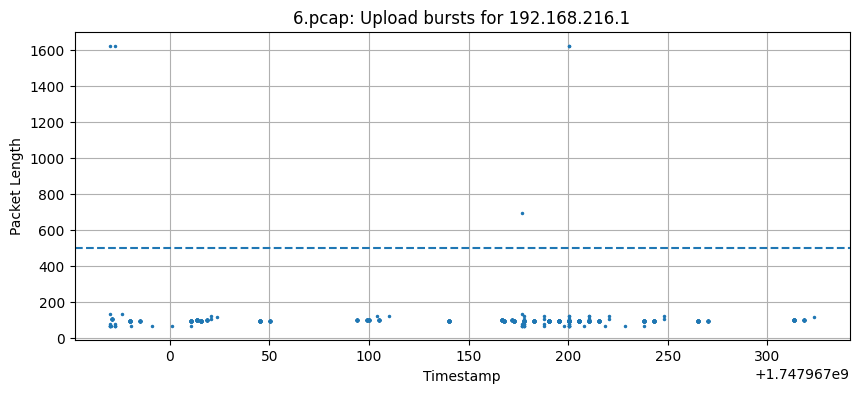


Client 192.168.216.22 TRUE upload rounds in 6.pcap:
  Round 1 at timestamp: 1747967000.248845
  Round 2 at timestamp: 1747967036.098262
  Round 3 at timestamp: 1747967071.235202
  Round 4 at timestamp: 1747967106.521059
  Round 5 at timestamp: 1747967142.085225
  Round 6 at timestamp: 1747967177.395310
  Round 7 at timestamp: 1747967213.689140
  Round 8 at timestamp: 1747967250.100250
  Round 9 at timestamp: 1747967285.628571
  Round 10 at timestamp: 1747967321.203747

Time differences between consecutive rounds:
  Round 1 -> Round 2: 35.849 seconds
  Round 2 -> Round 3: 35.137 seconds
  Round 3 -> Round 4: 35.286 seconds
  Round 4 -> Round 5: 35.564 seconds
  Round 5 -> Round 6: 35.310 seconds
  Round 6 -> Round 7: 36.294 seconds
  Round 7 -> Round 8: 36.411 seconds
  Round 8 -> Round 9: 35.528 seconds
  Round 9 -> Round 10: 35.575 seconds


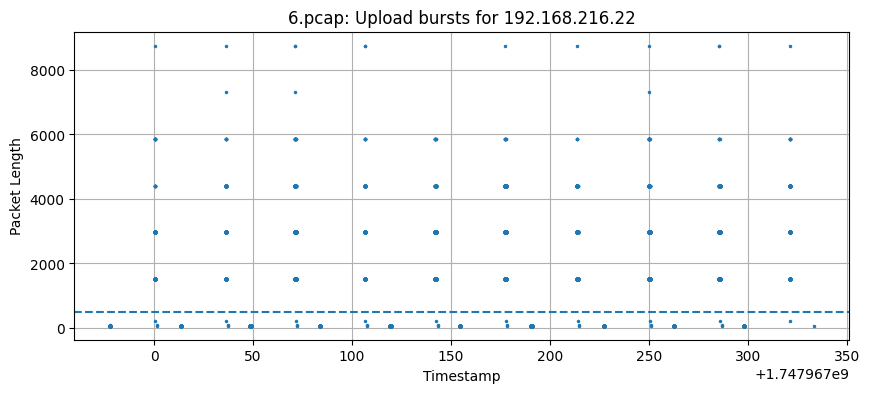


Client 192.168.216.223 TRUE upload rounds in 6.pcap:
  Round 1 at timestamp: 1747967011.105390
  Round 2 at timestamp: 1747967046.433102
  Round 3 at timestamp: 1747967081.762861
  Round 4 at timestamp: 1747967117.161896
  Round 5 at timestamp: 1747967152.439582
  Round 6 at timestamp: 1747967188.569945
  Round 7 at timestamp: 1747967225.041588
  Round 8 at timestamp: 1747967260.611504
  Round 9 at timestamp: 1747967296.062514
  Round 10 at timestamp: 1747967331.596094

Time differences between consecutive rounds:
  Round 1 -> Round 2: 35.328 seconds
  Round 2 -> Round 3: 35.330 seconds
  Round 3 -> Round 4: 35.399 seconds
  Round 4 -> Round 5: 35.278 seconds
  Round 5 -> Round 6: 36.130 seconds
  Round 6 -> Round 7: 36.472 seconds
  Round 7 -> Round 8: 35.570 seconds
  Round 8 -> Round 9: 35.451 seconds
  Round 9 -> Round 10: 35.534 seconds


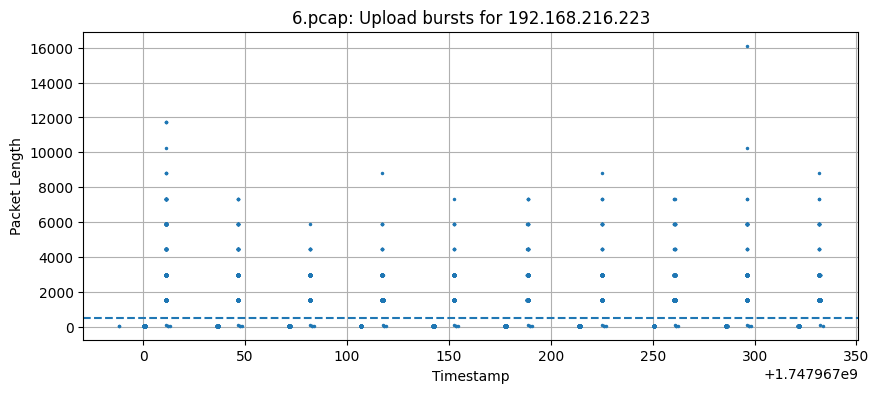

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!pip install scapy

import os
from scapy.all import rdpcap
import matplotlib.pyplot as plt

pcapFolder = "/content/drive/My Drive/pcapFL"
serverIp = "192.168.216.85"

uploadThreshold = 500
gapThreshold = 1.0

pcapFiles = sorted(
    [fileName for fileName in os.listdir(pcapFolder) if fileName.endswith(".pcap")],
    key=lambda fileName: int(fileName.split(".")[0])
)

for pcapFile in pcapFiles:
    print(f"\n==============================")
    print(f"Processing {pcapFile}")
    print("==============================")

    pcapPath = os.path.join(pcapFolder, pcapFile)
    packets = rdpcap(pcapPath)

    dataByIp = {}

    for packet in packets:
        if packet.haslayer("IP") and packet["IP"].dst == serverIp:
            srcIp = packet["IP"].src
            timestamp = packet.time
            length = len(packet)

            if not srcIp:
                continue

            if srcIp not in dataByIp:
                dataByIp[srcIp] = {"time": [], "length": []}

            dataByIp[srcIp]["time"].append(timestamp)
            dataByIp[srcIp]["length"].append(length)

    for ipAddress, values in dataByIp.items():
        times = values["time"]
        lengths = values["length"]

        uploadRounds = []
        lastRoundTime = None

        for t, L in zip(times, lengths):
            if L > uploadThreshold:
                if lastRoundTime is None or (t - lastRoundTime) > gapThreshold:
                    uploadRounds.append(t)
                    lastRoundTime = t

        print(f"\nClient {ipAddress} TRUE upload rounds in {pcapFile}:")

        if len(uploadRounds) == 0:
            print("  No valid upload rounds detected.")
        else:
            for index, ts in enumerate(uploadRounds, start=1):
                print(f"  Round {index} at timestamp: {ts}")

            if len(uploadRounds) > 1:
                print("\nTime differences between consecutive rounds:")
                for i, (t1, t2) in enumerate(
                    zip(uploadRounds[:-1], uploadRounds[1:]), start=1
                ):
                    diff = t2 - t1
                    print(f"  Round {i} -> Round {i+1}: {diff:.3f} seconds")

        plt.figure(figsize=(10, 4))
        plt.plot(times, lengths, ".", markersize=3)
        plt.axhline(uploadThreshold, linestyle='--')
        plt.title(f"{pcapFile}: Upload bursts for {ipAddress}")
        plt.xlabel("Timestamp")
        plt.ylabel("Packet Length")
        plt.grid(True)
        plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processing 1.pcap ...


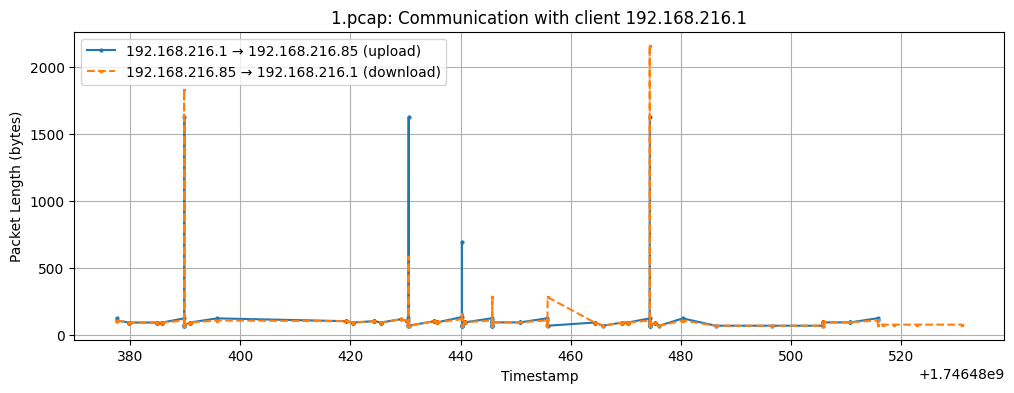

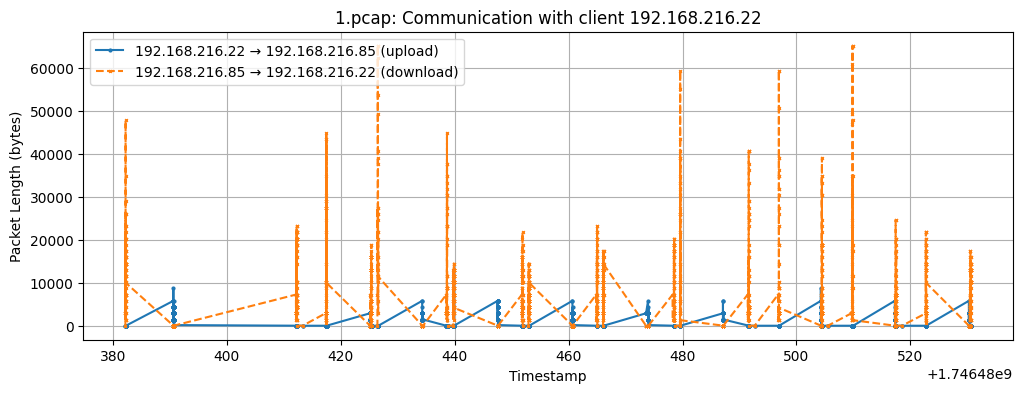

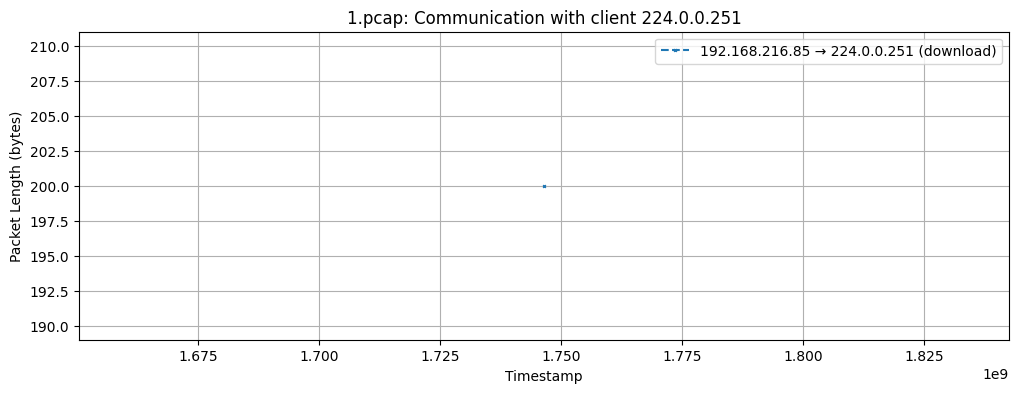

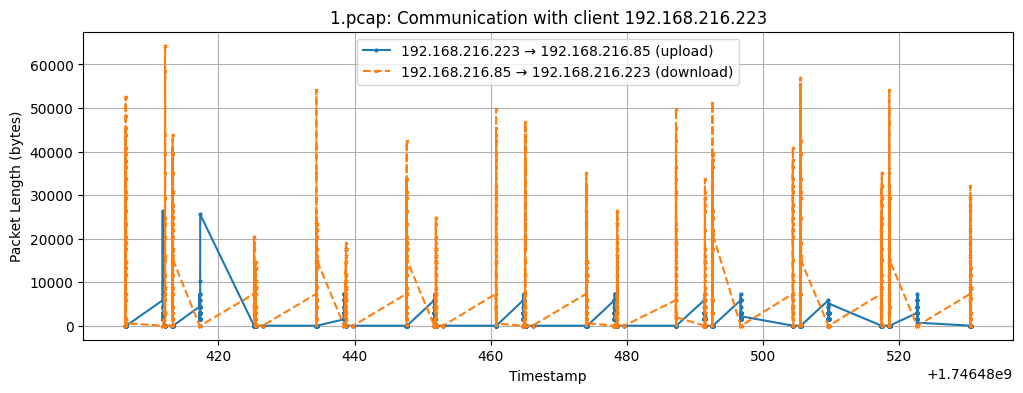

Finished plotting for 1.pcap.

Processing 2.pcap ...


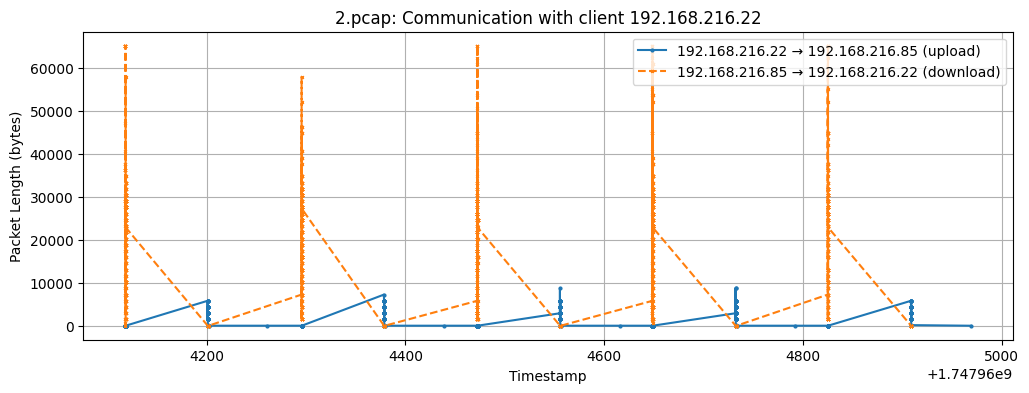

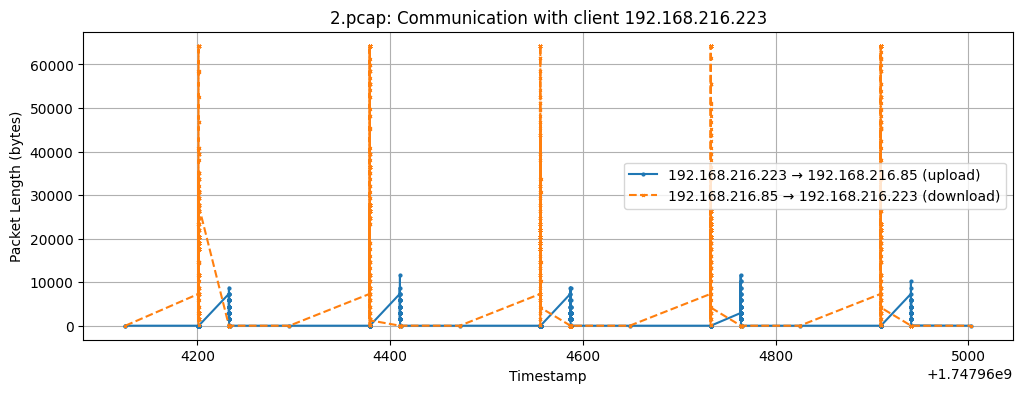

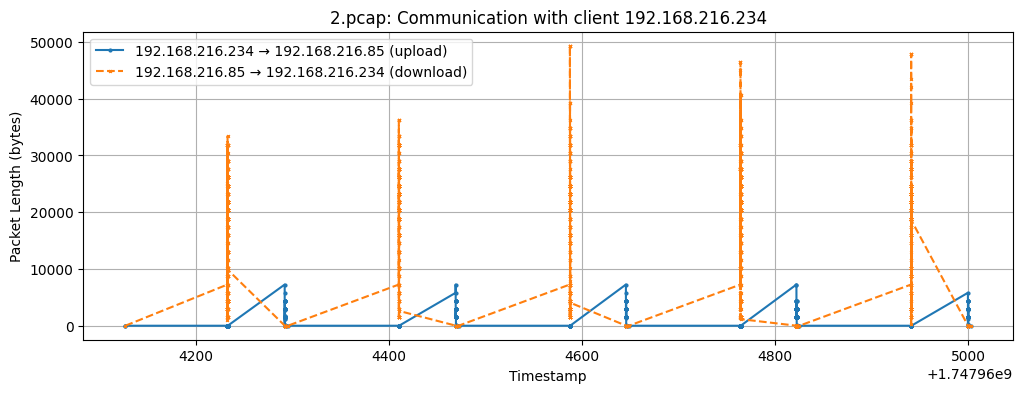

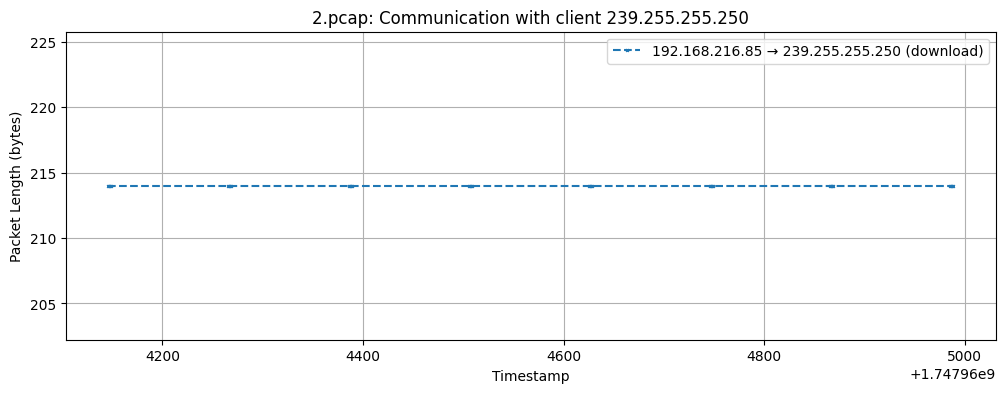

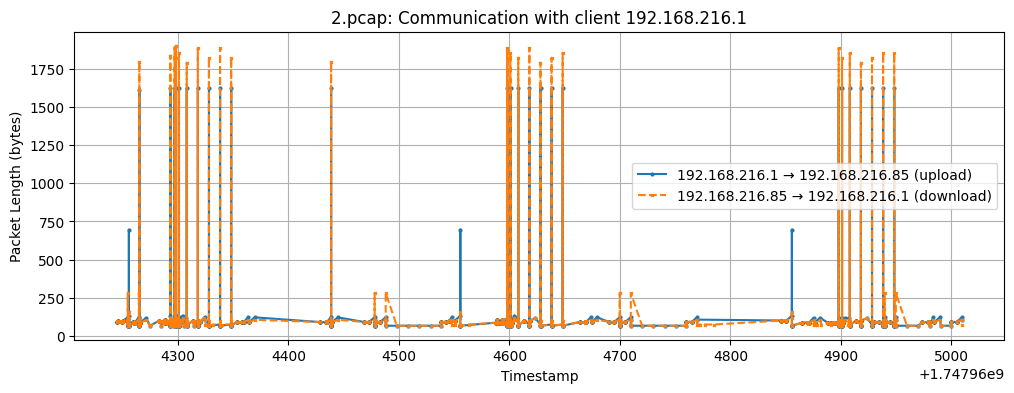

Finished plotting for 2.pcap.

Processing 3.pcap ...


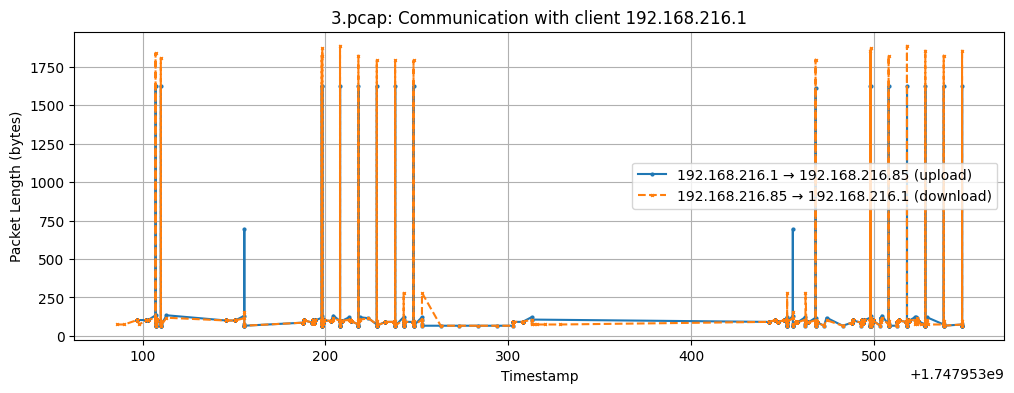

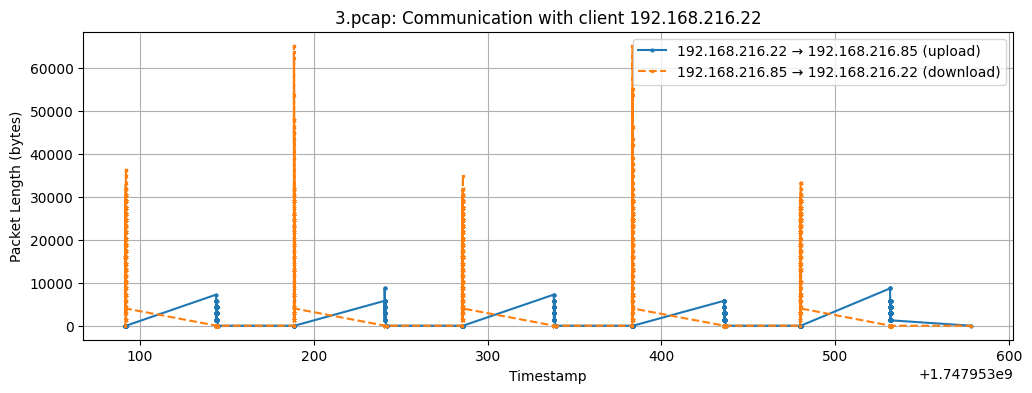

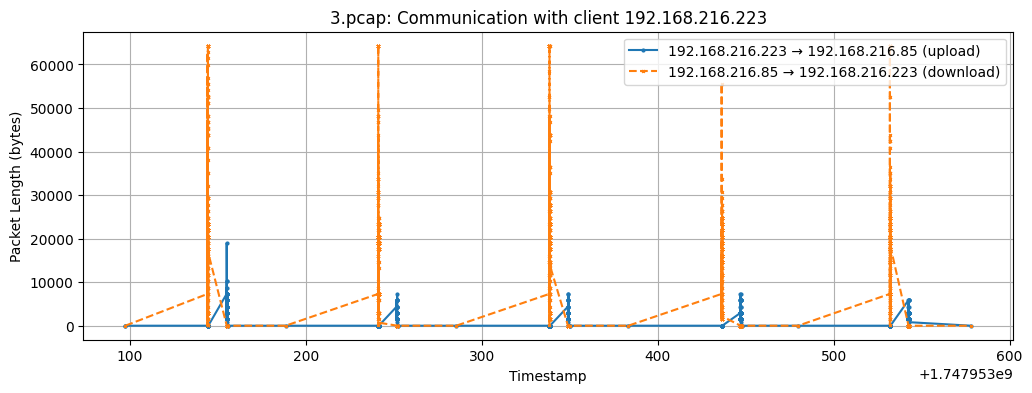

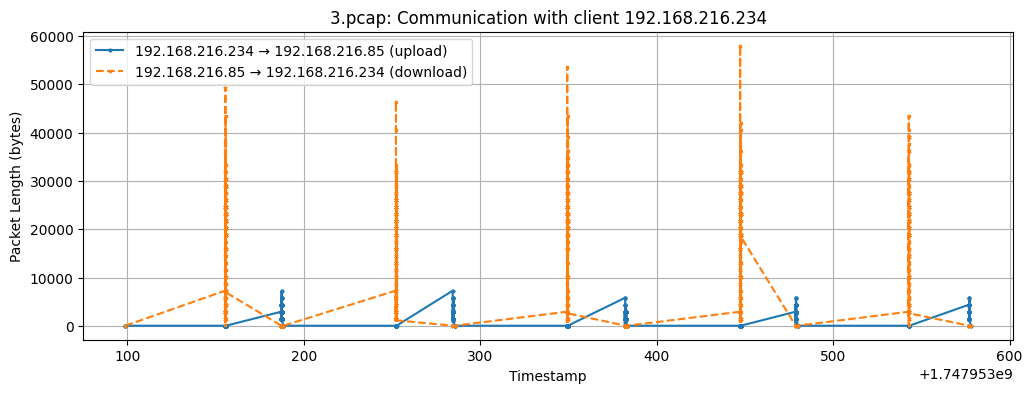

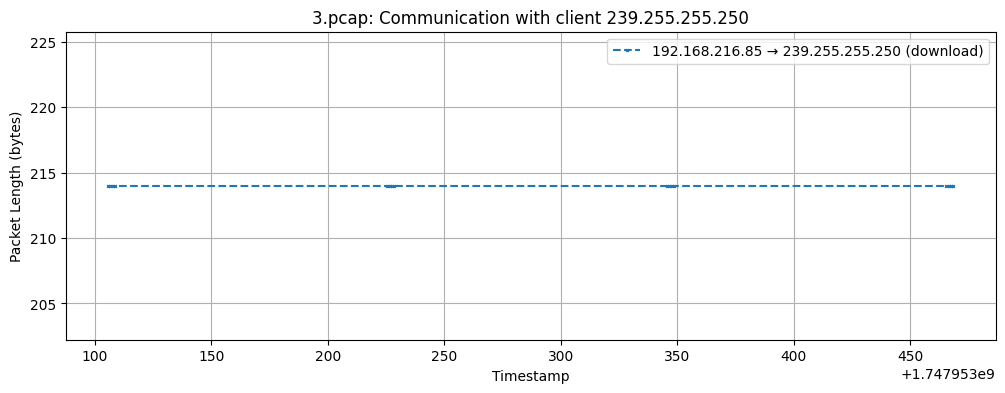

Finished plotting for 3.pcap.

Processing 4.pcap ...


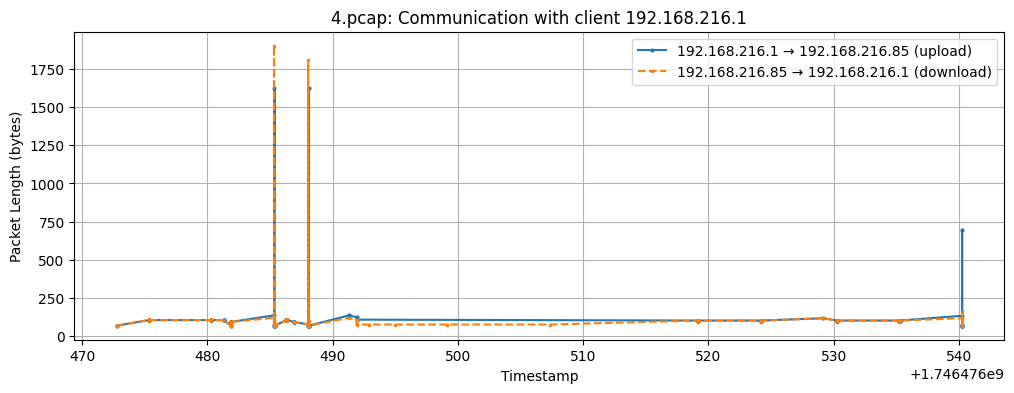

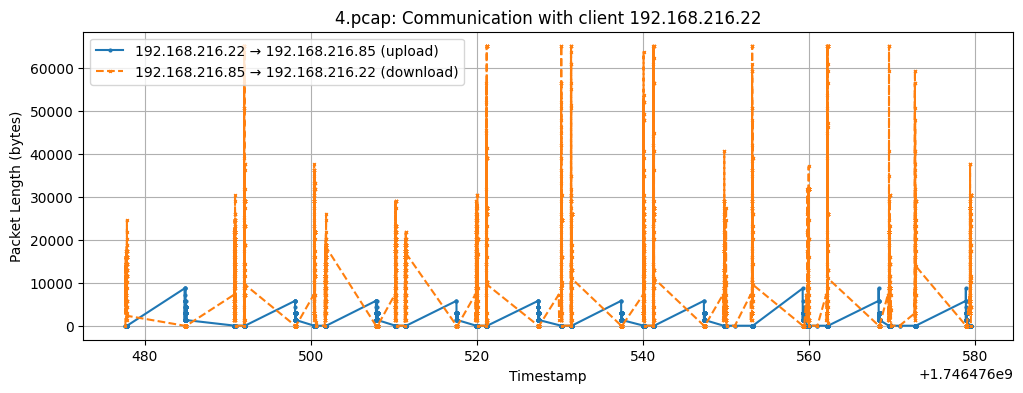

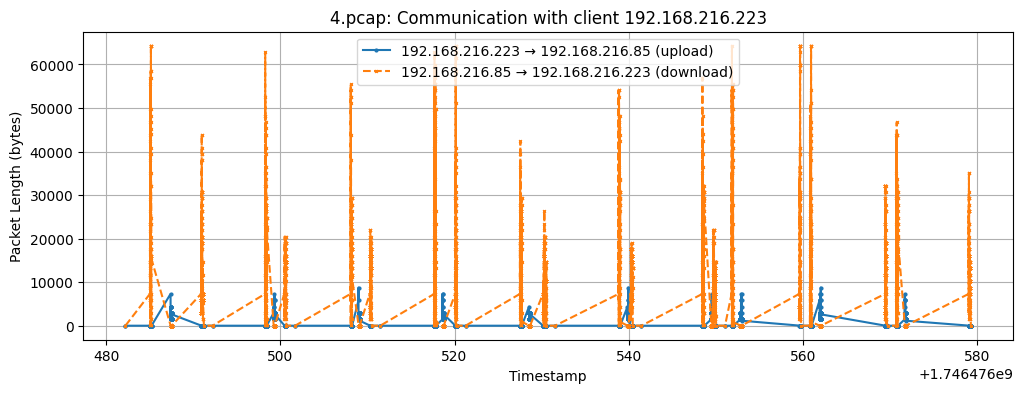

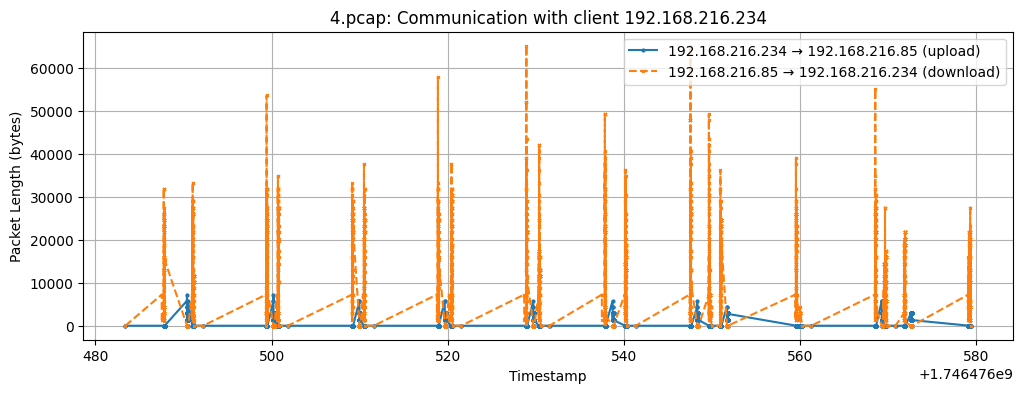

Finished plotting for 4.pcap.

Processing 5.pcap ...


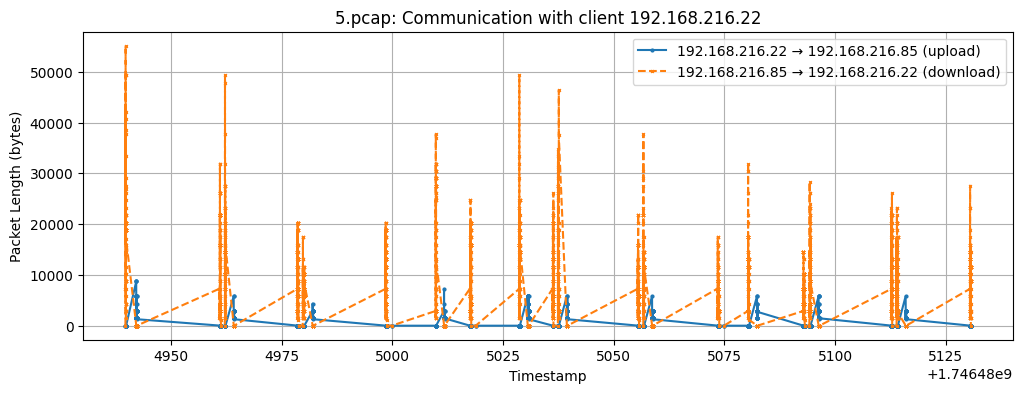

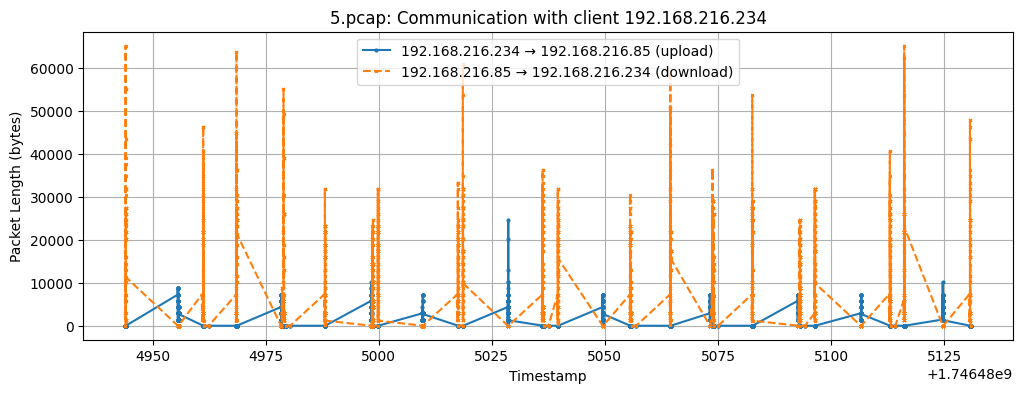

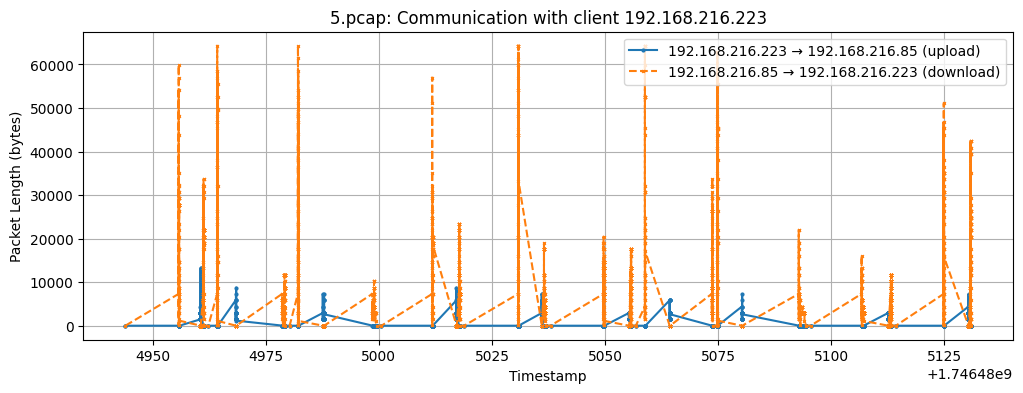

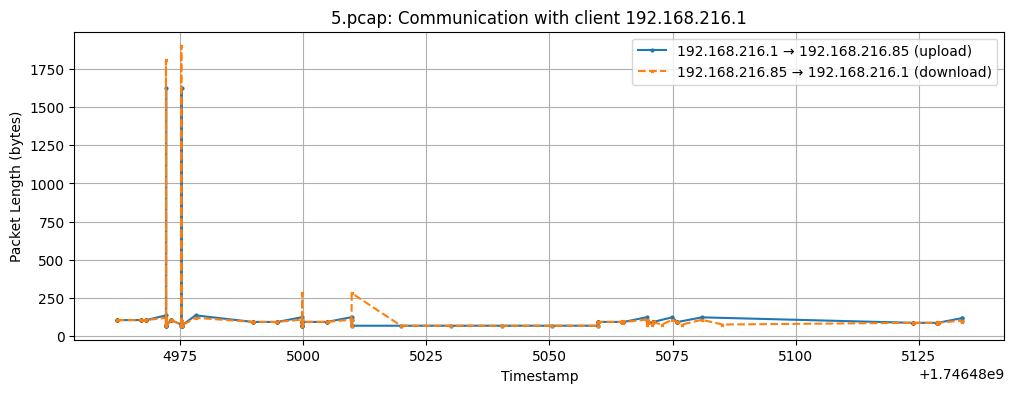

Finished plotting for 5.pcap.

Processing 6.pcap ...


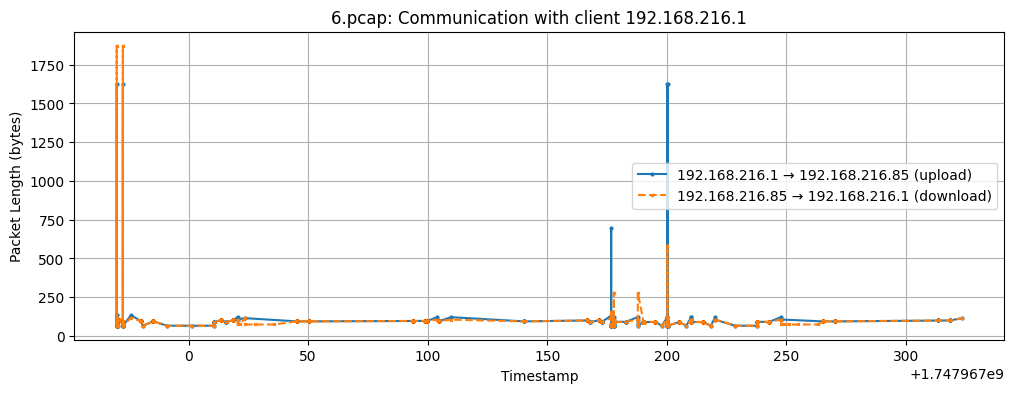

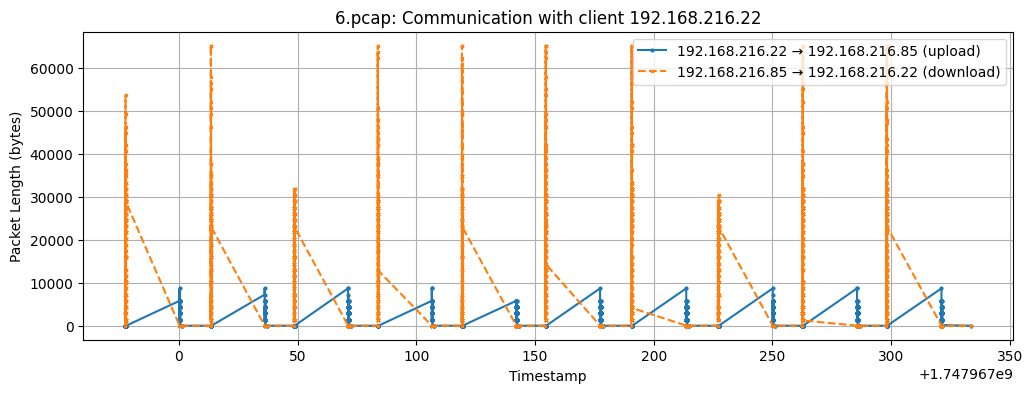

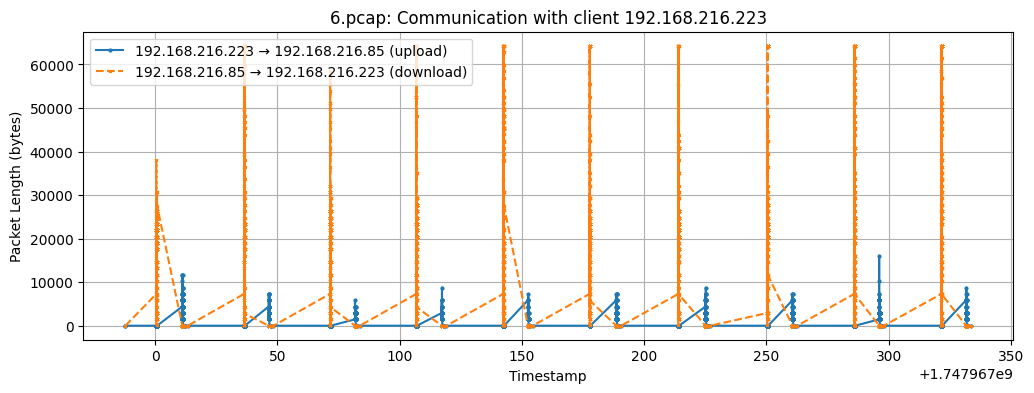

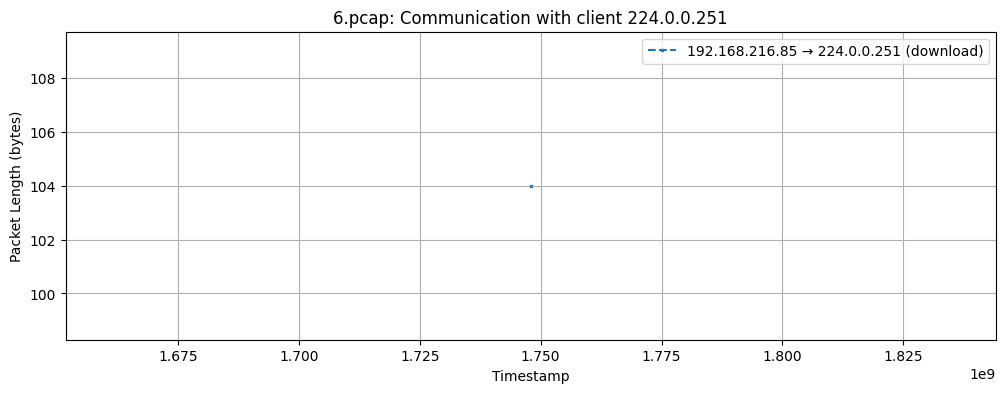

Finished plotting for 6.pcap.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

!pip install scapy

import os
from scapy.all import rdpcap
import matplotlib.pyplot as plt

pcapFolder = "/content/drive/My Drive/pcapFL"
serverIp = "192.168.216.85"

pcapFiles = sorted(
    [fileName for fileName in os.listdir(pcapFolder) if fileName.endswith(".pcap")],
    key=lambda fileName: int(fileName.split(".")[0])
)

for pcapFile in pcapFiles:
    print(f"\nProcessing {pcapFile} ...")
    pcapPath = os.path.join(pcapFolder, pcapFile)

    packets = rdpcap(pcapPath)
    traffic = {}

    for packet in packets:
        if packet.haslayer("IP"):
            srcIp = packet["IP"].src
            dstIp = packet["IP"].dst
            timestamp = packet.time
            length = len(packet)

            if dstIp == serverIp:
                if srcIp not in traffic:
                    traffic[srcIp] = {
                        "uploadTime": [], "uploadLen": [],
                        "downloadTime": [], "downloadLen": []
                    }
                traffic[srcIp]["uploadTime"].append(timestamp)
                traffic[srcIp]["uploadLen"].append(length)

            if srcIp == serverIp:
                if dstIp not in traffic:
                    traffic[dstIp] = {
                        "uploadTime": [], "uploadLen": [],
                        "downloadTime": [], "downloadLen": []
                    }
                traffic[dstIp]["downloadTime"].append(timestamp)
                traffic[dstIp]["downloadLen"].append(length)

    for ipAddress, values in traffic.items():
        if len(values["uploadTime"]) == 0 and len(values["downloadTime"]) == 0:
            continue

        plt.figure(figsize=(12, 4))

        if len(values["uploadTime"]) > 0:
            plt.plot(
                values["uploadTime"], values["uploadLen"],
                marker='o', linestyle='-', markersize=2,
                label=f"{ipAddress} → {serverIp} (upload)"
            )

        if len(values["downloadTime"]) > 0:
            plt.plot(
                values["downloadTime"], values["downloadLen"],
                marker='x', linestyle='--', markersize=2,
                label=f"{serverIp} → {ipAddress} (download)"
            )

        plt.title(f"{pcapFile}: Communication with client {ipAddress}")
        plt.xlabel("Timestamp")
        plt.ylabel("Packet Length (bytes)")
        plt.grid(True)
        plt.legend()
        plt.show()

    print(f"Finished plotting for {pcapFile}.")


##Question3

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
csv_folder = "/content/drive/My Drive/pcapFL"
server_ip = "192.168.216.85"
UPLOAD_THRESHOLD = 2750

csv_files = sorted(
    [f for f in os.listdir(csv_folder) if f.endswith(".csv")],
    key=lambda x: int(x.split(".")[0])
)


In [ ]:
feature_rows = []

for csv_file in csv_files:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))

    df = df[(df["dst_ip"] == server_ip) & (df["src_ip"].notna())]
    df = df.sort_values("timestamp")

    for client_ip, cdf in df.groupby("src_ip"):
        big_pkts = cdf[cdf["length"] > UPLOAD_THRESHOLD]

        if len(big_pkts) < 2:
            continue

        times = big_pkts["timestamp"].values
        gaps = np.diff(times)

        # Adaptive threshold: top 20% of gaps separate rounds
        gap_threshold = np.percentile(gaps, 80)

        rounds = []
        current = [times[0]]

        for i in range(1, len(times)):
            if times[i] - times[i-1] <= gap_threshold:
                current.append(times[i])
            else:
                rounds.append(current)
                current = [times[i]]

        rounds.append(current)

        # ---- Feature computation ----
        round_sizes = []
        round_packets = []
        round_durations = []

        for r in rounds:
            pkt_rows = big_pkts[big_pkts["timestamp"].isin(r)]
            round_packets.append(len(pkt_rows))
            round_sizes.append(pkt_rows["length"].sum())
            round_durations.append(r[-1] - r[0])

        feature_rows.append({
            "pcap": csv_file,
            "client_ip": client_ip,
            "num_rounds": len(rounds),
            "avg_update_size": np.mean(round_sizes),
            "avg_packets_per_round": np.mean(round_packets),
            "avg_round_duration": np.mean(round_durations),
            "avg_inter_round_gap": np.mean(gaps[gaps > gap_threshold]) if np.any(gaps > gap_threshold) else 0
        })


In [ ]:
features_df = pd.DataFrame(feature_rows)
print(features_df)


     pcap        client_ip  num_rounds  avg_packet_size  median_packet_size  \
0   1.csv   192.168.216.22          10      3065.046618              2962.0   
1   1.csv  192.168.216.223          10      3903.503488              3120.0   
2   2.csv   192.168.216.22           5      3042.021217              2962.0   
3   2.csv  192.168.216.223           5      3141.106961              2974.0   
4   2.csv  192.168.216.234           5      3011.106486              2962.0   
5   3.csv   192.168.216.22           5      3051.914561              2962.0   
6   3.csv  192.168.216.223           5      3304.480012              2974.0   
7   3.csv  192.168.216.234           5      3021.409797              2962.0   
8   4.csv   192.168.216.22          10      3008.114725              2962.0   
9   4.csv  192.168.216.223          10      3310.377010              2974.0   
10  4.csv  192.168.216.234          10      3111.621413              2962.0   
11  5.csv   192.168.216.22          10      3011.154

In [ ]:
features_df = pd.DataFrame(feature_rows)
print(features_df.head())


    pcap        client_ip  num_rounds  avg_update_size  avg_packets_per_round  \
0  1.csv   192.168.216.22         291     15433.353952               5.020619   
1  1.csv  192.168.216.223          81     18416.814815               4.938272   
2  2.csv   192.168.216.22        1074     15294.448790               5.027002   
3  2.csv  192.168.216.223         361     15678.415512               4.991690   
4  2.csv  192.168.216.234         348     15012.362069               4.985632   

   avg_round_duration  avg_inter_round_gap  
0            0.000769             0.481281  
1            0.002281             1.383518  
2            0.000666             0.659445  
3            0.001762             1.965464  
4            0.001955             2.037961  


In [ ]:
X = features_df[
    ["avg_update_size", "avg_packets_per_round",
     "avg_round_duration", "avg_inter_round_gap"]
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
features_df["cluster"] = kmeans.fit_predict(X_scaled)

print("Clusters assigned successfully.")


Clusters assigned successfully.


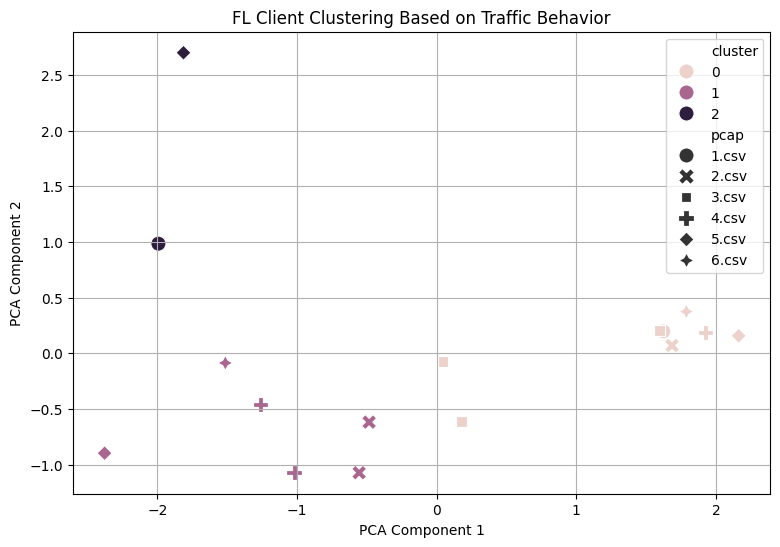

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(9,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=features_df["cluster"],
    style=features_df["pcap"],
    s=120
)

plt.title("FL Client Clustering Based on Traffic Behavior")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [ ]:
cluster_summary = features_df.groupby("cluster").mean(numeric_only=True)
print(cluster_summary)


         num_rounds  avg_update_size  avg_packets_per_round  \
cluster                                                       
0            836.25     15326.673059               5.012055   
1            213.50     16021.824894               4.971918   
2            114.50     19768.316191               4.952244   

         avg_round_duration  avg_inter_round_gap  
cluster                                           
0                  0.000904             0.554350  
1                  0.003776             1.430524  
2                  0.002100             1.266615  


##Ques 3 paper


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import entropy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
csv_folder = "/content/drive/My Drive/pcapFL"
server_ip = "192.168.216.85"

csv_files = sorted(
    [f for f in os.listdir(csv_folder) if f.endswith(".csv")],
    key=lambda x: int(x.split(".")[0])
)


Mounted at /content/drive


In [ ]:
rows = []

for csv_file in csv_files:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    df = df[df["src_ip"].notna()]

    for (src, dst), g in df.groupby(["src_ip", "dst_ip"]):
        g = g.sort_values("timestamp")
        times = g["timestamp"].values
        lengths = g["length"].values

        if len(times) < 10:
            continue

        inter_arrival = np.diff(times)

        rows.append({
            "pcap": csv_file,
            "src_ip": src,
            "dst_ip": dst,
            "mean_frame": np.mean(lengths),
            "std_frame": np.std(lengths),
            "mean_ia": np.mean(inter_arrival),
            "std_ia": np.std(inter_arrival),
            "uplink_ratio": np.mean(g["dst_ip"] == server_ip),
        })


In [ ]:
features_df = pd.DataFrame(rows)
features_df.head()


pcap           src_ip          dst_ip   mean_frame    std_frame   mean_ia  \
0  1.csv    192.168.216.1  192.168.216.85    98.875979    98.451425  0.180751   
1  1.csv   192.168.216.22  192.168.216.85  1107.111602  1168.772759  0.019286   
2  1.csv  192.168.216.223  192.168.216.85  1401.395427   992.079681  0.020883   
3  1.csv   192.168.216.85   192.168.216.1    97.660256    98.841773  0.197206   
4  1.csv   192.168.216.85  192.168.216.22  3218.183858  7028.267275  0.029223   

     std_ia  uplink_ratio  
0  1.223347           1.0  
1  0.396590           1.0  
2  0.348005           1.0  
3  1.255926           0.0  
4  0.485956           0.0

In [ ]:
X = features_df[
    ["mean_frame", "std_frame", "mean_ia", "std_ia", "uplink_ratio"]
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
features_df["cluster"] = kmeans.fit_predict(X_scaled)


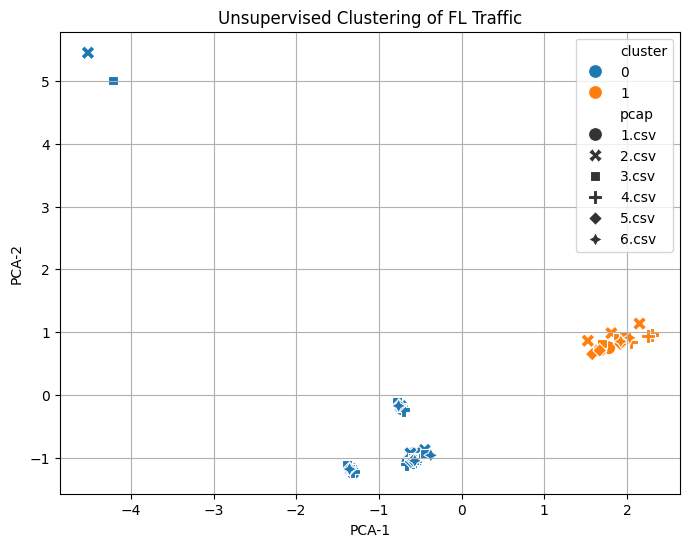

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=features_df["cluster"],
    style=features_df["pcap"],
    s=100
)

plt.title("Unsupervised Clustering of FL Traffic")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.grid(True)
plt.show()


In [ ]:
def kl_divergence(p, q):
    p = p / p.sum()
    q = q / q.sum()
    return entropy(p, q)


In [ ]:
import numpy as np
from scipy.stats import entropy

def kl_divergence(p, q, bins=50):
    hist_p, bin_edges = np.histogram(p, bins=bins, density=True)
    hist_q, _ = np.histogram(q, bins=bin_edges, density=True)

    hist_p += 1e-10
    hist_q += 1e-10

    return entropy(hist_p, hist_q)


In [ ]:
bins_ia = np.histogram_bin_edges(features_df["mean_ia"], bins=30)

dist0_ia, _ = np.histogram(
    features_df[features_df.cluster == 0]["mean_ia"], bins=bins_ia
)
dist1_ia, _ = np.histogram(
    features_df[features_df.cluster == 1]["mean_ia"], bins=bins_ia
)

kl_ia = kl_divergence(dist0_ia + 1e-6, dist1_ia + 1e-6)
print("KL(mean inter-arrival):", kl_ia)


KL(mean inter-arrival): 2.0023439444820887


In [ ]:
cluster0 = features_df[features_df.cluster == 0]["std_frame"]
cluster1 = features_df[features_df.cluster == 1]["std_frame"]

kl_std_frame = kl_divergence(cluster0, cluster1)

print("KL divergence (std_frame):", kl_std_frame)


KL divergence (std_frame): nan


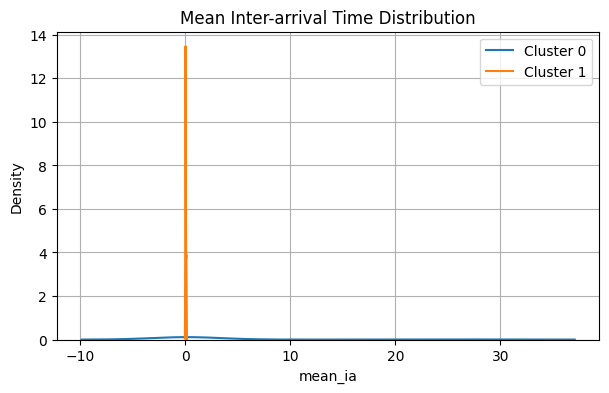

In [ ]:
plt.figure(figsize=(7,4))
sns.kdeplot(features_df[features_df.cluster==0]["mean_ia"], label="Cluster 0")
sns.kdeplot(features_df[features_df.cluster==1]["mean_ia"], label="Cluster 1")
plt.title("Mean Inter-arrival Time Distribution")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
bins_frame = np.histogram_bin_edges(features_df["mean_frame"], bins=30)

dist0_f, _ = np.histogram(
    features_df[features_df.cluster == 0]["mean_frame"], bins=bins_frame
)
dist1_f, _ = np.histogram(
    features_df[features_df.cluster == 1]["mean_frame"], bins=bins_frame
)

kl_frame = kl_divergence(dist0_f + 1e-6, dist1_f + 1e-6)
print("KL(mean packet size):", kl_frame)


KL(mean packet size): 14.79901999629815


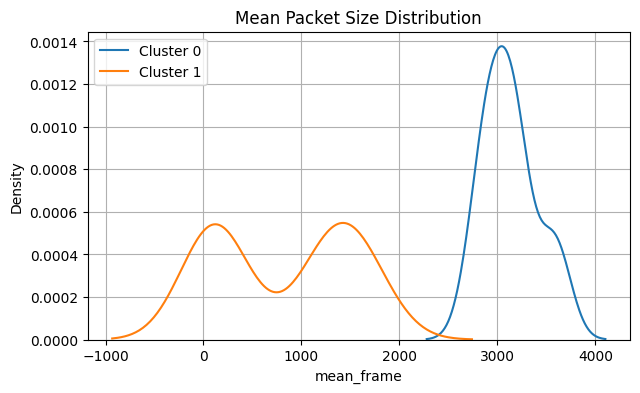

In [ ]:
plt.figure(figsize=(7,4))
sns.kdeplot(features_df[features_df.cluster==1]["mean_frame"], label="Cluster 0")
sns.kdeplot(features_df[features_df.cluster==0]["mean_frame"], label="Cluster 1")
plt.title("Mean Packet Size Distribution")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
features_df.groupby("cluster")[["mean_frame", "mean_ia", "std_ia"]].mean()


mean_frame   mean_ia    std_ia
cluster                                 
0         814.519984  1.815050  4.360483
1        3129.130352  0.039344  1.063861

In [ ]:
cluster_summary = (
    features_df
    .groupby("cluster")[[
        "mean_frame", "std_frame",
        "mean_ia", "std_ia",
        "uplink_ratio"
    ]]
    .mean()
)

cluster_summary


mean_frame    std_frame   mean_ia    std_ia  uplink_ratio
cluster                                                            
0         814.519984   533.828168  1.815050  4.360483      0.733333
1        3129.130352  8165.559683  0.039344  1.063861      0.000000

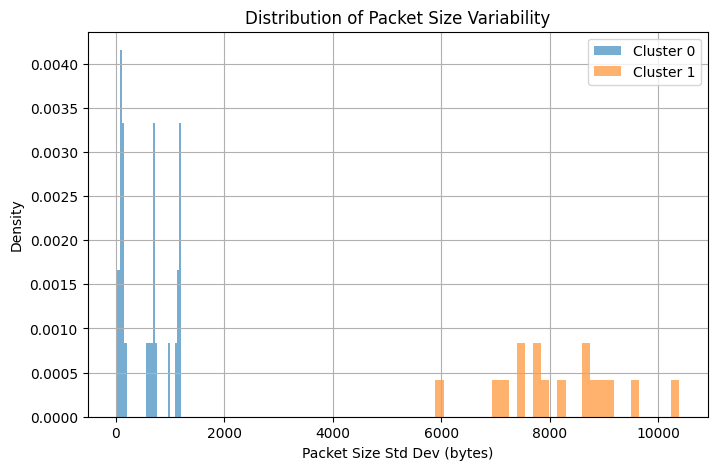

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(cluster0, bins=30, density=True, alpha=0.6, label="Cluster 0")
plt.hist(cluster1, bins=30, density=True, alpha=0.6, label="Cluster 1")
plt.xlabel("Packet Size Std Dev (bytes)")
plt.ylabel("Density")
plt.title("Distribution of Packet Size Variability")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
cluster0 = features_df[features_df.cluster == 0]["std_ia"]
cluster1 = features_df[features_df.cluster == 1]["std_ia"]

kl_std_ia = kl_divergence(cluster0, cluster1)

print("KL divergence (std_ia):", kl_std_ia)


KL divergence (std_ia): 1.9250739733696158


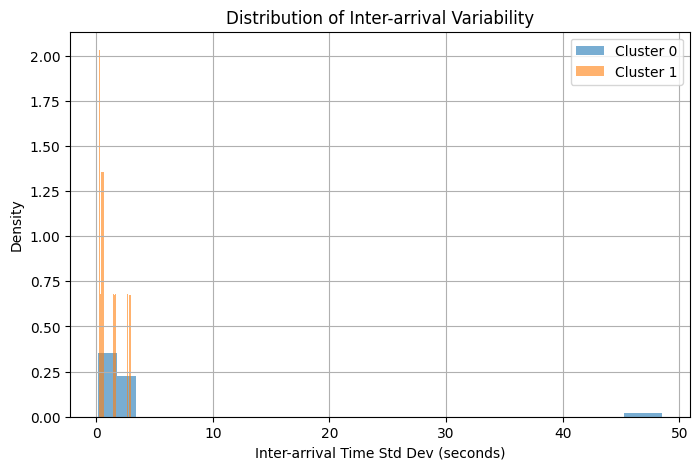

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(cluster0, bins=30, density=True, alpha=0.6, label="Cluster 0")
plt.hist(cluster1, bins=30, density=True, alpha=0.6, label="Cluster 1")
plt.xlabel("Inter-arrival Time Std Dev (seconds)")
plt.ylabel("Density")
plt.title("Distribution of Inter-arrival Variability")
plt.legend()
plt.grid(True)
plt.show()


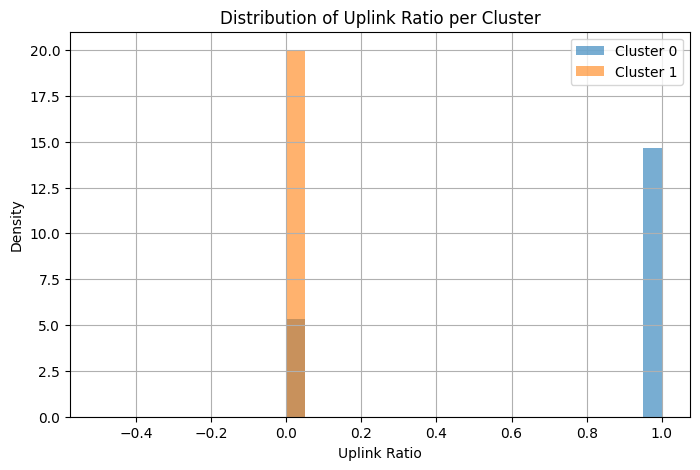

In [ ]:
cluster0 = features_df[features_df.cluster == 0]["uplink_ratio"]
cluster1 = features_df[features_df.cluster == 1]["uplink_ratio"]

plt.figure(figsize=(8,5))
plt.hist(cluster0, bins=20, density=True, alpha=0.6, label="Cluster 0")
plt.hist(cluster1, bins=20, density=True, alpha=0.6, label="Cluster 1")
plt.xlabel("Uplink Ratio")
plt.ylabel("Density")
plt.title("Distribution of Uplink Ratio per Cluster")
plt.legend()
plt.grid(True)
plt.show()
